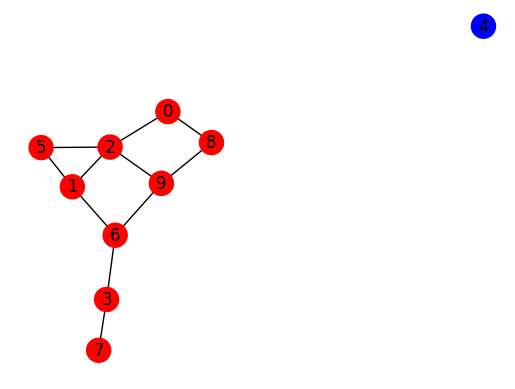

In [13]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# „Ç∞„É©„Éï„ÅÆ‰ΩúÊàê
G = nx.erdos_renyi_graph(n=10, p=0.2, seed=42)

# „Éé„Éº„ÉâÂ±ûÊÄß„ÅÆÂàùÊúüÂåñ
for node in G.nodes:
    G.nodes[node]['state'] = np.random.choice([0, 1])  # Áä∂ÊÖã„Çí0„Åæ„Åü„ÅØ1„Å´ÂàùÊúüÂåñ

def get_markov_blanket(G, node):
    neighbors = list(G.neighbors(node))
    markov_blanket = neighbors[:]
    for neighbor in neighbors:
        markov_blanket.extend(list(G.neighbors(neighbor)))
    markov_blanket = set(markov_blanket)
    markov_blanket.discard(node)  # Ëá™Ë∫´„ÅØÈô§„Åè
    return list(markov_blanket)

def update_state(G, node):
    markov_blanket = get_markov_blanket(G, node)
    states = [G.nodes[neighbor]['state'] for neighbor in markov_blanket]
    if len(states) > 0:
        G.nodes[node]['state'] = np.random.choice(states)  # „Éñ„É©„É≥„Ç±„ÉÉ„ÉàÂÜÖ„ÅÆÁä∂ÊÖã„Å´Âü∫„Å•„ÅçÊõ¥Êñ∞

# „Ç∑„Éü„É•„É¨„Éº„Ç∑„Éß„É≥„ÅÆÂÆüË°å
iterations = 10
for _ in range(iterations):
    for node in G.nodes:
        update_state(G, node)

# ÁµêÊûú„ÅÆÂèØË¶ñÂåñ
node_colors = ['red' if G.nodes[node]['state'] == 1 else 'blue' for node in G.nodes]
pos = nx.spring_layout(G, seed=42)

# ÊèèÁîª„ÅÆË™øÊï¥
plt.figure()  # Êñ∞„Åó„ÅÑÂõ≥„Çí‰ΩúÊàê
ax = plt.gca()  # ÁèæÂú®„ÅÆËª∏„ÇíÂèñÂæó
nx.draw(G, pos, node_color=node_colors, with_labels=True, ax=ax)  # ÊåáÂÆö„Åó„ÅüËª∏„Å´ÊèèÁîª
plt.show()

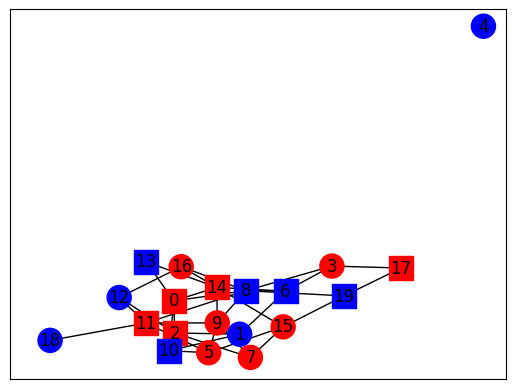

In [14]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# „Ç∞„É©„Éï„ÅÆ‰ΩúÊàê
G = nx.erdos_renyi_graph(n=20, p=0.2, seed=42)

# „Éé„Éº„ÉâÂ±ûÊÄß„ÅÆÂàùÊúüÂåñ
for node in G.nodes:
    G.nodes[node]['state'] = np.random.choice([0, 1])  # Áä∂ÊÖã„Çí0„Åæ„Åü„ÅØ1„Å´ÂàùÊúüÂåñ
    G.nodes[node]['type'] = 'internal' if np.random.rand() > 0.5 else 'external'  # ÂÜÖÈÉ®„Éé„Éº„Éâ„Å®Â§ñÈÉ®„Éé„Éº„Éâ„Å´„É©„É≥„ÉÄ„É†„Å´ÂàÜ„Åë„Çã

def get_markov_blanket(G, node):
    neighbors = list(G.neighbors(node))
    markov_blanket = neighbors[:]
    for neighbor in neighbors:
        markov_blanket.extend(list(G.neighbors(neighbor)))
    markov_blanket = set(markov_blanket)
    markov_blanket.discard(node)  # Ëá™Ë∫´„ÅØÈô§„Åè
    return list(markov_blanket)

def update_state(G, node):
    markov_blanket = get_markov_blanket(G, node)
    states = [G.nodes[neighbor]['state'] for neighbor in markov_blanket if G.nodes[neighbor]['type'] == 'external']
    if len(states) > 0:
        if G.nodes[node]['type'] == 'internal':
            # ÂÜÖÈÉ®„Éé„Éº„Éâ„ÅØÂ§ñÈÉ®„Éé„Éº„Éâ„ÅÆÁä∂ÊÖã„Å´Âü∫„Å•„ÅÑ„Å¶ÊÑüÁü•
            G.nodes[node]['state'] = np.random.choice(states)
        elif G.nodes[node]['type'] == 'external':
            # Â§ñÈÉ®„Éé„Éº„Éâ„ÅØÂÜÖÈÉ®„Éé„Éº„Éâ„Å´ÂΩ±Èüø„Çí‰∏é„Åà„ÇãÔºà„Åì„Åì„Åß„ÅØÁ∞°Áï•Âåñ„Åó„Å¶„É©„É≥„ÉÄ„É†„Å™ÂΩ±Èüø„Çí‰∏é„Åà„ÇãÔºâ
            for neighbor in markov_blanket:
                if G.nodes[neighbor]['type'] == 'internal':
                    G.nodes[neighbor]['state'] = np.random.choice(states)

# „Ç∑„Éü„É•„É¨„Éº„Ç∑„Éß„É≥„ÅÆÂÆüË°å
iterations = 10
for _ in range(iterations):
    for node in G.nodes:
        update_state(G, node)

# ÁµêÊûú„ÅÆÂèØË¶ñÂåñ
node_colors = ['red' if G.nodes[node]['state'] == 1 else 'blue' for node in G.nodes]
node_shapes = ['o' if G.nodes[node]['type'] == 'internal' else 's' for node in G.nodes]
pos = nx.spring_layout(G, seed=42)

# ÊèèÁîª„ÅÆË™øÊï¥
plt.figure()  # Êñ∞„Åó„ÅÑÂõ≥„Çí‰ΩúÊàê
ax = plt.gca()  # ÁèæÂú®„ÅÆËª∏„ÇíÂèñÂæó
for shape in set(node_shapes):
    nx.draw_networkx_nodes(G, pos, node_color=[node_colors[i] for i in range(len(node_shapes)) if node_shapes[i] == shape],
                           node_shape=shape, nodelist=[i for i in range(len(node_shapes)) if node_shapes[i] == shape], ax=ax)
nx.draw_networkx_edges(G, pos, ax=ax)
nx.draw_networkx_labels(G, pos, ax=ax)
plt.show()

In [15]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# „Ç∞„É©„Éï„ÅÆ‰ΩúÊàê
G = nx.erdos_renyi_graph(n=20, p=0.2, seed=42)

# „Éé„Éº„ÉâÂ±ûÊÄß„ÅÆÂàùÊúüÂåñ
for node in G.nodes:
    G.nodes[node]['state'] = np.random.choice([0, 1])  # Áä∂ÊÖã„Çí0„Åæ„Åü„ÅØ1„Å´ÂàùÊúüÂåñ
    G.nodes[node]['type'] = 'internal' if np.random.rand() > 0.5 else 'external'  # ÂÜÖÈÉ®„Éé„Éº„Éâ„Å®Â§ñÈÉ®„Éé„Éº„Éâ„Å´„É©„É≥„ÉÄ„É†„Å´ÂàÜ„Åë„Çã
    G.nodes[node]['alive'] = True  # „Éé„Éº„Éâ„ÅÆÁîüÂ≠òÁä∂ÊÖã„ÇíËøΩÂä†

# ‰ΩìÂÜÖÁí∞Â¢É„ÅÆÂàùÊúüÂåñ
internal_environment = {
    'energy': 100,  # „Ç®„Éç„É´„ÇÆ„Éº„É¨„Éô„É´
    'hydration': 100,  # Ê∞¥ÂàÜ„É¨„Éô„É´
    'nutrients': 100  # Ê†ÑÈ§ä„É¨„Éô„É´
}
threshold = 20  # ÁµÑÁπîÂ¥©Â£ä„ÅÆÈñæÂÄ§

def get_markov_blanket(G, node):
    neighbors = list(G.neighbors(node))
    markov_blanket = neighbors[:]
    for neighbor in neighbors:
        markov_blanket.extend(list(G.neighbors(neighbor)))
    markov_blanket = set(markov_blanket)
    markov_blanket.discard(node)  # Ëá™Ë∫´„ÅØÈô§„Åè
    return list(markov_blanket)

def update_state(G, node, internal_environment):
    if not G.nodes[node]['alive']:
        return  # „Éé„Éº„Éâ„ÅåÊ≠ª„Çì„Åß„ÅÑ„ÇãÂ†¥Âêà„ÅØÊõ¥Êñ∞„Åó„Å™„ÅÑ
    markov_blanket = get_markov_blanket(G, node)
    states = [G.nodes[neighbor]['state'] for neighbor in markov_blanket if G.nodes[neighbor]['type'] == 'external' and G.nodes[neighbor]['alive']]
    if len(states) > 0:
        if G.nodes[node]['type'] == 'internal':
            # ÂÜÖÈÉ®„Éé„Éº„Éâ„ÅØÂ§ñÈÉ®„Éé„Éº„Éâ„ÅÆÁä∂ÊÖã„Å´Âü∫„Å•„ÅÑ„Å¶ÊÑüÁü•
            G.nodes[node]['state'] = np.random.choice(states)
        elif G.nodes[node]['type'] == 'external':
            # Â§ñÈÉ®„Éé„Éº„Éâ„ÅØÂÜÖÈÉ®„Éé„Éº„Éâ„Å´ÂΩ±Èüø„Çí‰∏é„Åà„ÇãÔºà„Åì„Åì„Åß„ÅØÁ∞°Áï•Âåñ„Åó„Å¶„É©„É≥„ÉÄ„É†„Å™ÂΩ±Èüø„Çí‰∏é„Åà„ÇãÔºâ
            for neighbor in markov_blanket:
                if G.nodes[neighbor]['type'] == 'internal' and G.nodes[neighbor]['alive']:
                    G.nodes[neighbor]['state'] = np.random.choice(states)

def decrement_internal_environment(internal_environment):
    # ÊôÇÈñì„Å®„Å®„ÇÇ„Å´‰ΩìÂÜÖÁí∞Â¢É„Éë„É©„É°„Éº„Çø„ÇíÊ∏õÂ∞ë„Åï„Åõ„Çã
    internal_environment['energy'] -= 1
    internal_environment['hydration'] -= 1
    internal_environment['nutrients'] -= 1

def check_environment_and_update_nodes(G, internal_environment):
    if any(value < threshold for value in internal_environment.values()):
        # ‰ΩìÂÜÖÁí∞Â¢É„ÅåÈñæÂÄ§‰ª•‰∏ã„ÅÆÂ†¥Âêà„ÄÅ„É©„É≥„ÉÄ„É†„Å´ÂÜÖÈÉ®„Éé„Éº„Éâ„ÇíÂ¥©Â£ä„Åï„Åõ„Çã
        internal_nodes = [node for node in G.nodes if G.nodes[node]['type'] == 'internal' and G.nodes[node]['alive']]
        if internal_nodes:
            node_to_kill = np.random.choice(internal_nodes)
            G.nodes[node_to_kill]['alive'] = False
            print(f"„Éé„Éº„Éâ {node_to_kill} „ÅåÂ¥©Â£ä„Åó„Åæ„Åó„Åü„ÄÇ")

# „Ç∑„Éü„É•„É¨„Éº„Ç∑„Éß„É≥„ÅÆÂÆüË°å
iterations = 100  # „Ç∑„Éü„É•„É¨„Éº„Ç∑„Éß„É≥„ÅÆÂõûÊï∞
for t in range(iterations):
    for node in G.nodes:
        update_state(G, node, internal_environment)
    decrement_internal_environment(internal_environment)
    check_environment_and_update_nodes(G, internal_environment)

# ÁµêÊûú„ÅÆÂèØË¶ñÂåñ
node_colors = ['red' if G.nodes[node]['state'] == 1 and G.nodes[node]['alive'] else 'blue' if G.nodes[node]['alive'] else 'gray' for node in G.nodes]
node_shapes = ['o' if G.nodes[node]['type'] == 'internal' else 's' for node in G.nodes]
pos = nx.spring_layout(G, seed=42)

# ÊèèÁîª„ÅÆË™øÊï¥
plt.figure()  # Êñ∞„Åó„ÅÑÂõ≥„Çí‰ΩúÊàê
ax = plt.gca()  # ÁèæÂú®„ÅÆËª∏„ÇíÂèñÂæó
for shape in set(node_shapes):
    nx.draw_networkx_nodes(G, pos, node_color=[node_colors[i] for i in range(len(node_shapes)) if node_shapes[i] == shape],
                           node_shape=shape, nodelist=[i for i in range(len(node_shapes)) if node_shapes[i] == shape], ax=ax)
nx.draw_networkx_edges(G, pos, ax=ax)
nx.draw_networkx_labels(G, pos, ax=ax)
plt.show()

„Éé„Éº„Éâ 16 „ÅåÂ¥©Â£ä„Åó„Åæ„Åó„Åü„ÄÇ
„Éé„Éº„Éâ 17 „ÅåÂ¥©Â£ä„Åó„Åæ„Åó„Åü„ÄÇ
„Éé„Éº„Éâ 4 „ÅåÂ¥©Â£ä„Åó„Åæ„Åó„Åü„ÄÇ
„Éé„Éº„Éâ 9 „ÅåÂ¥©Â£ä„Åó„Åæ„Åó„Åü„ÄÇ
„Éé„Éº„Éâ 13 „ÅåÂ¥©Â£ä„Åó„Åæ„Åó„Åü„ÄÇ
„Éé„Éº„Éâ 2 „ÅåÂ¥©Â£ä„Åó„Åæ„Åó„Åü„ÄÇ
„Éé„Éº„Éâ 1 „ÅåÂ¥©Â£ä„Åó„Åæ„Åó„Åü„ÄÇ
„Éé„Éº„Éâ 15 „ÅåÂ¥©Â£ä„Åó„Åæ„Åó„Åü„ÄÇ
„Éé„Éº„Éâ 7 „ÅåÂ¥©Â£ä„Åó„Åæ„Åó„Åü„ÄÇ


In [16]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# „Ç∞„É©„Éï„ÅÆ‰ΩúÊàê
G = nx.erdos_renyi_graph(n=20, p=0.2, seed=42)

# „Éé„Éº„ÉâÂ±ûÊÄß„ÅÆÂàùÊúüÂåñ
for node in G.nodes:
    G.nodes[node]['state'] = np.random.choice([0, 1])  # Áä∂ÊÖã„Çí0„Åæ„Åü„ÅØ1„Å´ÂàùÊúüÂåñ
    G.nodes[node]['type'] = 'internal' if np.random.rand() > 0.5 else 'external'  # ÂÜÖÈÉ®„Éé„Éº„Éâ„Å®Â§ñÈÉ®„Éé„Éº„Éâ„Å´„É©„É≥„ÉÄ„É†„Å´ÂàÜ„Åë„Çã
    G.nodes[node]['alive'] = True  # „Éé„Éº„Éâ„ÅÆÁîüÂ≠òÁä∂ÊÖã„ÇíËøΩÂä†

# „Éé„Éº„Éâ„ÅÆ‰ΩçÁΩÆ„ÇíË®àÁÆó
pos = nx.spring_layout(G, seed=42)

# „Ç®„Éç„É´„ÇÆ„ÉºÊ∫ê„ÅÆË®≠ÂÆöÔºàÁâπÂÆö„ÅÆÂú∞ÂüüÂÜÖ„Å´„É©„É≥„ÉÄ„É†„Å´ÈÖçÁΩÆÔºâ
def set_energy_source(G, pos, region_center, region_radius):
    possible_nodes = [node for node in G.nodes if np.linalg.norm(pos[node] - region_center) <= region_radius]
    if not possible_nodes:
        raise ValueError("ÊåáÂÆö„Åï„Çå„ÅüÂú∞ÂüüÂÜÖ„Å´„Éé„Éº„Éâ„ÅåÂ≠òÂú®„Åó„Åæ„Åõ„Çì„ÄÇ")
    return np.random.choice(possible_nodes)

region_center = np.array([0.5, 0.5])
region_radius = 0.2
energy_source = set_energy_source(G, pos, region_center, region_radius)

# „Ç∑„Éü„É•„É¨„Éº„Ç∑„Éß„É≥„ÅÆ„Éë„É©„É°„Éº„Çø
initial_energy = 1000  # ÁµÑÁπîÂÖ®‰Ωì„ÅÆÂàùÊúü„Ç®„Éç„É´„ÇÆ„Éº
organization_energy = initial_energy  # ÁµÑÁπîÂÖ®‰Ωì„ÅÆ„Ç®„Éç„É´„ÇÆ„Éº
threshold = 200  # ÁµÑÁπîÂ¥©Â£ä„ÅÆÈñæÂÄ§
energy_boost = 200  # „Ç®„Éç„É´„ÇÆ„ÉºË£úÁµ¶Èáè
energy_radius = 2  # „Ç®„Éç„É´„ÇÆ„ÉºÊ∫ê„Åã„Çâ„ÅÆË∑ùÈõ¢
decrement_rate = 10  # „Ç®„Éç„É´„ÇÆ„Éº„ÅÆÊ∏õÂ∞ëÁéá

def get_markov_blanket(G, node):
    neighbors = list(G.neighbors(node))
    markov_blanket = neighbors[:]
    for neighbor in neighbors:
        markov_blanket.extend(list(G.neighbors(neighbor)))
    markov_blanket = set(markov_blanket)
    markov_blanket.discard(node)  # Ëá™Ë∫´„ÅØÈô§„Åè
    return list(markov_blanket)

def update_state(G, node):
    if not G.nodes[node]['alive']:
        return  # „Éé„Éº„Éâ„ÅåÊ≠ª„Çì„Åß„ÅÑ„ÇãÂ†¥Âêà„ÅØÊõ¥Êñ∞„Åó„Å™„ÅÑ
    markov_blanket = get_markov_blanket(G, node)
    external_info = [G.nodes[neighbor]['state'] for neighbor in markov_blanket if G.nodes[neighbor]['type'] == 'external' and G.nodes[neighbor]['alive']]
    if len(external_info) > 0:
        if G.nodes[node]['type'] == 'internal':
            # ÂÜÖÈÉ®„Éé„Éº„Éâ„ÅØÂ§ñÈÉ®„Éé„Éº„Éâ„ÅÆÊÉÖÂ†±„ÇíÂü∫„Å´Áä∂ÊÖã„ÇíÊõ¥Êñ∞
            G.nodes[node]['state'] = np.random.choice(external_info)
        elif G.nodes[node]['type'] == 'external':
            # Â§ñÈÉ®„Éé„Éº„Éâ„ÅØÂÜÖÈÉ®„Éé„Éº„Éâ„Å´ÂΩ±Èüø„Çí‰∏é„Åà„Çã
            for neighbor in markov_blanket:
                if G.nodes[neighbor]['type'] == 'internal' and G.nodes[neighbor]['alive']:
                    G.nodes[neighbor]['state'] = np.random.choice(external_info)

def decrement_energy():
    global organization_energy
    organization_energy -= decrement_rate
    if organization_energy <= threshold:
        print(f"ÁµÑÁπî„ÅÆ„Ç®„Éç„É´„ÇÆ„Éº„ÅåÈñæÂÄ§„Çí‰∏ãÂõû„Çä„Åæ„Åó„Åü„ÄÇ„Ç®„Éç„É´„ÇÆ„Éº: {organization_energy}")
        return False
    return True

def replenish_energy(G, energy_source, energy_radius):
    global organization_energy
    for node in G.nodes:
        if G.nodes[node]['type'] == 'internal' and G.nodes[node]['alive']:
            if nx.shortest_path_length(G, source=node, target=energy_source) <= energy_radius:
                organization_energy += energy_boost
                print(f"„Éé„Éº„Éâ {node} „Åå„Ç®„Éç„É´„ÇÆ„ÉºÊ∫ê {energy_source} „Åã„Çâ„Ç®„Éç„É´„ÇÆ„Éº„ÇíË£úÁµ¶„Åó„Åæ„Åó„Åü„ÄÇÁèæÂú®„ÅÆÁµÑÁπî„Ç®„Éç„É´„ÇÆ„Éº: {organization_energy}")

def estimate_energy_source(G, internal_node):
    markov_blanket = get_markov_blanket(G, internal_node)
    external_info = [neighbor for neighbor in markov_blanket if G.nodes[neighbor]['type'] == 'external' and G.nodes[neighbor]['alive']]
    if not external_info:
        return None
    # Â§ñÈÉ®„Éé„Éº„Éâ„ÅÆ‰ΩçÁΩÆ„ÇíÂü∫„Å´„Ç®„Éç„É´„ÇÆ„ÉºÊ∫ê„ÅÆÊé®Ê∏¨
    external_positions = [pos[neighbor] for neighbor in external_info]
    estimated_position = np.mean(external_positions, axis=0)
    # ÊúÄ„ÇÇËøë„ÅÑ„Éé„Éº„Éâ„Çí„Ç®„Éç„É´„ÇÆ„ÉºÊ∫ê„Å®„Åó„Å¶Êé®Ê∏¨
    closest_node = min(G.nodes, key=lambda node: np.linalg.norm(pos[node] - estimated_position))
    return closest_node

def move_towards_estimated_source(G, internal_node, estimated_source):
    if estimated_source and G.nodes[internal_node]['alive']:
        path = nx.shortest_path(G, source=internal_node, target=estimated_source)
        if len(path) > 1:
            next_node = path[1]
            pos[internal_node] = pos[next_node]  # „Éé„Éº„Éâ„ÇíÁßªÂãï„Åï„Åõ„ÇãÔºàÁ∞°Áï•ÂåñÔºâ

# „Ç∑„Éü„É•„É¨„Éº„Ç∑„Éß„É≥„ÅÆÂÆüË°å
iterations = 100  # „Ç∑„Éü„É•„É¨„Éº„Ç∑„Éß„É≥„ÅÆÂõûÊï∞
for t in range(iterations):
    for node in G.nodes:
        update_state(G, node)
    for node in G.nodes:
        if G.nodes[node]['type'] == 'internal':
            estimated_source = estimate_energy_source(G, node)
            move_towards_estimated_source(G, node, estimated_source)
    if not decrement_energy():
        print("ÁµÑÁπî„ÅåÂ¥©Â£ä„Åó„Åæ„Åó„Åü„ÄÇ")
        break
    replenish_energy(G, energy_source, energy_radius)

# ÁµêÊûú„ÅÆÂèØË¶ñÂåñ
node_colors = ['red' if G.nodes[node]['state'] == 1 and G.nodes[node]['alive'] else 'blue' if G.nodes[node]['alive'] else 'gray' for node in G.nodes]
node_shapes = ['o' if G.nodes[node]['type'] == 'internal' else 's' for node in G.nodes]

# „Ç®„Éç„É´„ÇÆ„ÉºÊ∫ê„ÅÆÂèØË¶ñÂåñ
nx.draw_networkx_nodes(G, pos, nodelist=[energy_source], node_color='green', node_shape='p', node_size=500, label='Energy Source')

# ÊèèÁîª„ÅÆË™øÊï¥
plt.figure()  # Êñ∞„Åó„ÅÑÂõ≥„Çí‰ΩúÊàê
ax = plt.gca()  # ÁèæÂú®„ÅÆËª∏„ÇíÂèñÂæó
for shape in set(node_shapes):
    nx.draw_networkx_nodes(G, pos, node_color=[node_colors[i] for i in range(len(node_shapes)) if node_shapes[i] == shape],
                           node_shape=shape, nodelist=[i for i in range(len(node_shapes)) if node_shapes[i] == shape], ax=ax)
nx.draw_networkx_edges(G, pos, ax=ax)
nx.draw_networkx_labels(G, pos, ax=ax)
plt.show()

ValueError: ÊåáÂÆö„Åï„Çå„ÅüÂú∞ÂüüÂÜÖ„Å´„Éé„Éº„Éâ„ÅåÂ≠òÂú®„Åó„Åæ„Åõ„Çì„ÄÇ

In [17]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# „Ç∞„É©„Éï„ÅÆ‰ΩúÊàê
G = nx.erdos_renyi_graph(n=20, p=0.2, seed=42)

# „Éé„Éº„ÉâÂ±ûÊÄß„ÅÆÂàùÊúüÂåñ
for node in G.nodes:
    G.nodes[node]['state'] = np.random.choice([0, 1])  # Áä∂ÊÖã„Çí0„Åæ„Åü„ÅØ1„Å´ÂàùÊúüÂåñ
    G.nodes[node]['type'] = 'internal' if np.random.rand() > 0.5 else 'external'  # ÂÜÖÈÉ®„Éé„Éº„Éâ„Å®Â§ñÈÉ®„Éé„Éº„Éâ„Å´„É©„É≥„ÉÄ„É†„Å´ÂàÜ„Åë„Çã
    G.nodes[node]['alive'] = True  # „Éé„Éº„Éâ„ÅÆÁîüÂ≠òÁä∂ÊÖã„ÇíËøΩÂä†

# „Éé„Éº„Éâ„ÅÆ‰ΩçÁΩÆ„ÇíË®àÁÆó
pos = nx.spring_layout(G, seed=42)

# „Ç®„Éç„É´„ÇÆ„ÉºÊ∫ê„ÅÆË®≠ÂÆöÔºàÁâπÂÆö„ÅÆÂú∞ÂüüÂÜÖ„Å´„É©„É≥„ÉÄ„É†„Å´ÈÖçÁΩÆÔºâ
def set_energy_source(G, pos, region_center, region_radius):
    possible_nodes = [node for node in G.nodes if np.linalg.norm(pos[node] - region_center) <= region_radius]
    if not possible_nodes:
        return None
    return np.random.choice(possible_nodes)

# „Ç®„Éç„É´„ÇÆ„ÉºÊ∫ê„ÅÆË®≠ÂÆö„ÇíË§áÊï∞ÂõûË©¶Ë°å
def find_energy_source(G, pos, region_center, initial_radius, max_attempts):
    radius_increment = 0.1
    for attempt in range(max_attempts):
        energy_source = set_energy_source(G, pos, region_center, initial_radius + attempt * radius_increment)
        if energy_source is not None:
            return energy_source
    return None

region_center = np.array([0.5, 0.5])
initial_radius = 0.2
max_attempts = 10
energy_source = find_energy_source(G, pos, region_center, initial_radius, max_attempts)
if energy_source is None:
    raise ValueError("ÊåáÂÆö„Åï„Çå„ÅüÂú∞ÂüüÂÜÖ„Å´„Ç®„Éç„É´„ÇÆ„ÉºÊ∫ê„ÇíË®≠ÂÆö„Åß„Åç„Åæ„Åõ„Çì„Åß„Åó„Åü„ÄÇ")

# „Ç∑„Éü„É•„É¨„Éº„Ç∑„Éß„É≥„ÅÆ„Éë„É©„É°„Éº„Çø
initial_energy = 1000  # ÁµÑÁπîÂÖ®‰Ωì„ÅÆÂàùÊúü„Ç®„Éç„É´„ÇÆ„Éº
organization_energy = initial_energy  # ÁµÑÁπîÂÖ®‰Ωì„ÅÆ„Ç®„Éç„É´„ÇÆ„Éº
threshold = 200  # ÁµÑÁπîÂ¥©Â£ä„ÅÆÈñæÂÄ§
energy_boost = 200  # „Ç®„Éç„É´„ÇÆ„ÉºË£úÁµ¶Èáè
energy_radius = 2  # „Ç®„Éç„É´„ÇÆ„ÉºÊ∫ê„Åã„Çâ„ÅÆË∑ùÈõ¢
decrement_rate = 10  # „Ç®„Éç„É´„ÇÆ„Éº„ÅÆÊ∏õÂ∞ëÁéá

def get_markov_blanket(G, node):
    neighbors = list(G.neighbors(node))
    markov_blanket = neighbors[:]
    for neighbor in neighbors:
        markov_blanket.extend(list(G.neighbors(neighbor)))
    markov_blanket = set(markov_blanket)
    markov_blanket.discard(node)  # Ëá™Ë∫´„ÅØÈô§„Åè
    return list(markov_blanket)

def update_state(G, node):
    if not G.nodes[node]['alive']:
        return  # „Éé„Éº„Éâ„ÅåÊ≠ª„Çì„Åß„ÅÑ„ÇãÂ†¥Âêà„ÅØÊõ¥Êñ∞„Åó„Å™„ÅÑ
    markov_blanket = get_markov_blanket(G, node)
    external_info = [G.nodes[neighbor]['state'] for neighbor in markov_blanket if G.nodes[neighbor]['type'] == 'external' and G.nodes[neighbor]['alive']]
    if len(external_info) > 0:
        if G.nodes[node]['type'] == 'internal':
            # ÂÜÖÈÉ®„Éé„Éº„Éâ„ÅØÂ§ñÈÉ®„Éé„Éº„Éâ„ÅÆÊÉÖÂ†±„ÇíÂü∫„Å´Áä∂ÊÖã„ÇíÊõ¥Êñ∞
            G.nodes[node]['state'] = np.random.choice(external_info)
        elif G.nodes[node]['type'] == 'external':
            # Â§ñÈÉ®„Éé„Éº„Éâ„ÅØÂÜÖÈÉ®„Éé„Éº„Éâ„Å´ÂΩ±Èüø„Çí‰∏é„Åà„Çã
            for neighbor in markov_blanket:
                if G.nodes[neighbor]['type'] == 'internal' and G.nodes[neighbor]['alive']:
                    G.nodes[neighbor]['state'] = np.random.choice(external_info)

def decrement_energy():
    global organization_energy
    organization_energy -= decrement_rate
    if organization_energy <= threshold:
        print(f"ÁµÑÁπî„ÅÆ„Ç®„Éç„É´„ÇÆ„Éº„ÅåÈñæÂÄ§„Çí‰∏ãÂõû„Çä„Åæ„Åó„Åü„ÄÇ„Ç®„Éç„É´„ÇÆ„Éº: {organization_energy}")
        return False
    return True

def replenish_energy(G, energy_source, energy_radius):
    global organization_energy
    for node in G.nodes:
        if G.nodes[node]['type'] == 'internal' and G.nodes[node]['alive']:
            if nx.shortest_path_length(G, source=node, target=energy_source) <= energy_radius:
                organization_energy += energy_boost
                print(f"„Éé„Éº„Éâ {node} „Åå„Ç®„Éç„É´„ÇÆ„ÉºÊ∫ê {energy_source} „Åã„Çâ„Ç®„Éç„É´„ÇÆ„Éº„ÇíË£úÁµ¶„Åó„Åæ„Åó„Åü„ÄÇÁèæÂú®„ÅÆÁµÑÁπî„Ç®„Éç„É´„ÇÆ„Éº: {organization_energy}")

def estimate_energy_source(G, internal_node):
    markov_blanket = get_markov_blanket(G, internal_node)
    external_info = [neighbor for neighbor in markov_blanket if G.nodes[neighbor]['type'] == 'external' and G.nodes[neighbor]['alive']]
    if not external_info:
        return None
    # Â§ñÈÉ®„Éé„Éº„Éâ„ÅÆ‰ΩçÁΩÆ„ÇíÂü∫„Å´„Ç®„Éç„É´„ÇÆ„ÉºÊ∫ê„ÅÆÊé®Ê∏¨
    external_positions = [pos[neighbor] for neighbor in external_info]
    estimated_position = np.mean(external_positions, axis=0)
    # ÊúÄ„ÇÇËøë„ÅÑ„Éé„Éº„Éâ„Çí„Ç®„Éç„É´„ÇÆ„ÉºÊ∫ê„Å®„Åó„Å¶Êé®Ê∏¨
    closest_node = min(G.nodes, key=lambda node: np.linalg.norm(pos[node] - estimated_position))
    return closest_node

def move_towards_estimated_source(G, internal_node, estimated_source):
    if estimated_source and G.nodes[internal_node]['alive']:
        path = nx.shortest_path(G, source=internal_node, target=estimated_source)
        if len(path) > 1:
            next_node = path[1]
            pos[internal_node] = pos[next_node]  # „Éé„Éº„Éâ„ÇíÁßªÂãï„Åï„Åõ„ÇãÔºàÁ∞°Áï•ÂåñÔºâ

# „Ç∑„Éü„É•„É¨„Éº„Ç∑„Éß„É≥„ÅÆÂÆüË°å
iterations = 100  # „Ç∑„Éü„É•„É¨„Éº„Ç∑„Éß„É≥„ÅÆÂõûÊï∞
for t in range(iterations):
    for node in G.nodes:
        update_state(G, node)
    for node in G.nodes:
        if G.nodes[node]['type'] == 'internal':
            estimated_source = estimate_energy_source(G, node)
            move_towards_estimated_source(G, node, estimated_source)
    if not decrement_energy():
        print("ÁµÑÁπî„ÅåÂ¥©Â£ä„Åó„Åæ„Åó„Åü„ÄÇ")
        break
    replenish_energy(G, energy_source, energy_radius)

# ÁµêÊûú„ÅÆÂèØË¶ñÂåñ
node_colors = ['red' if G.nodes[node]['state'] == 1 and G.nodes[node]['alive'] else 'blue' if G.nodes[node]['alive'] else 'gray' for node in G.nodes]
node_shapes = ['o' if G.nodes[node]['type'] == 'internal' else 's' for node in G.nodes]

# „Ç®„Éç„É´„ÇÆ„ÉºÊ∫ê„ÅÆÂèØË¶ñÂåñ
nx.draw_networkx_nodes(G, pos, nodelist=[energy_source], node_color='green', node_shape='p', node_size=500, label='Energy Source')

# ÊèèÁîª„ÅÆË™øÊï¥
plt.figure()  # Êñ∞„Åó„ÅÑÂõ≥„Çí‰ΩúÊàê
ax = plt.gca()  # ÁèæÂú®„ÅÆËª∏„ÇíÂèñÂæó
for shape in set(node_shapes):
    nx.draw_networkx_nodes(G, pos, node_color=[node_colors[i] for i in range(len(node_shapes)) if node_shapes[i] == shape],
                           node_shape=shape, nodelist=[i for i in range(len(node_shapes)) if node_shapes[i] == shape], ax=ax)
nx.draw_networkx_edges(G, pos, ax=ax)
nx.draw_networkx_labels(G, pos, ax=ax)
plt.show()

„Éé„Éº„Éâ 3 „Åå„Ç®„Éç„É´„ÇÆ„ÉºÊ∫ê 17 „Åã„Çâ„Ç®„Éç„É´„ÇÆ„Éº„ÇíË£úÁµ¶„Åó„Åæ„Åó„Åü„ÄÇÁèæÂú®„ÅÆÁµÑÁπî„Ç®„Éç„É´„ÇÆ„Éº: 1190


NetworkXNoPath: No path between 4 and 17.

„Éé„Éº„Éâ 0 „Åå„Ç®„Éç„É´„ÇÆ„ÉºÊ∫ê 3 „Åã„Çâ„Ç®„Éç„É´„ÇÆ„Éº„ÇíË£úÁµ¶„Åó„Åæ„Åó„Åü„ÄÇÁèæÂú®„ÅÆÁµÑÁπî„Ç®„Éç„É´„ÇÆ„Éº: 1190
„Éé„Éº„Éâ 3 „Åå„Ç®„Éç„É´„ÇÆ„ÉºÊ∫ê 3 „Åã„Çâ„Ç®„Éç„É´„ÇÆ„Éº„ÇíË£úÁµ¶„Åó„Åæ„Åó„Åü„ÄÇÁèæÂú®„ÅÆÁµÑÁπî„Ç®„Éç„É´„ÇÆ„Éº: 1390
„Éé„Éº„Éâ 6 „Åå„Ç®„Éç„É´„ÇÆ„ÉºÊ∫ê 3 „Åã„Çâ„Ç®„Éç„É´„ÇÆ„Éº„ÇíË£úÁµ¶„Åó„Åæ„Åó„Åü„ÄÇÁèæÂú®„ÅÆÁµÑÁπî„Ç®„Éç„É´„ÇÆ„Éº: 1590
„Éé„Éº„Éâ 9 „Åå„Ç®„Éç„É´„ÇÆ„ÉºÊ∫ê 3 „Åã„Çâ„Ç®„Éç„É´„ÇÆ„Éº„ÇíË£úÁµ¶„Åó„Åæ„Åó„Åü„ÄÇÁèæÂú®„ÅÆÁµÑÁπî„Ç®„Éç„É´„ÇÆ„Éº: 1790
„Éé„Éº„Éâ 14 „Åå„Ç®„Éç„É´„ÇÆ„ÉºÊ∫ê 3 „Åã„Çâ„Ç®„Éç„É´„ÇÆ„Éº„ÇíË£úÁµ¶„Åó„Åæ„Åó„Åü„ÄÇÁèæÂú®„ÅÆÁµÑÁπî„Ç®„Éç„É´„ÇÆ„Éº: 1990
„Éé„Éº„Éâ 0 „Åå„Ç®„Éç„É´„ÇÆ„ÉºÊ∫ê 3 „Åã„Çâ„Ç®„Éç„É´„ÇÆ„Éº„ÇíË£úÁµ¶„Åó„Åæ„Åó„Åü„ÄÇÁèæÂú®„ÅÆÁµÑÁπî„Ç®„Éç„É´„ÇÆ„Éº: 2180
„Éé„Éº„Éâ 3 „Åå„Ç®„Éç„É´„ÇÆ„ÉºÊ∫ê 3 „Åã„Çâ„Ç®„Éç„É´„ÇÆ„Éº„ÇíË£úÁµ¶„Åó„Åæ„Åó„Åü„ÄÇÁèæÂú®„ÅÆÁµÑÁπî„Ç®„Éç„É´„ÇÆ„Éº: 2380
„Éé„Éº„Éâ 6 „Åå„Ç®„Éç„É´„ÇÆ„ÉºÊ∫ê 3 „Åã„Çâ„Ç®„Éç„É´„ÇÆ„Éº„ÇíË£úÁµ¶„Åó„Åæ„Åó„Åü„ÄÇÁèæÂú®„ÅÆÁµÑÁπî„Ç®„Éç„É´„ÇÆ„Éº: 2580
„Éé„Éº„Éâ 9 „Åå„Ç®„Éç„É´„ÇÆ„ÉºÊ∫ê 3 „Åã„Çâ„Ç®„Éç„É´„ÇÆ„

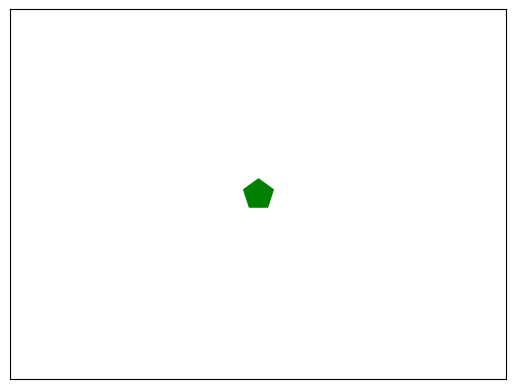

In [18]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# „Ç∞„É©„Éï„ÅÆ‰ΩúÊàê
G = nx.erdos_renyi_graph(n=20, p=0.2, seed=42)

# „Éé„Éº„ÉâÂ±ûÊÄß„ÅÆÂàùÊúüÂåñ
for node in G.nodes:
    G.nodes[node]['state'] = np.random.choice([0, 1])  # Áä∂ÊÖã„Çí0„Åæ„Åü„ÅØ1„Å´ÂàùÊúüÂåñ
    G.nodes[node]['type'] = 'internal' if np.random.rand() > 0.5 else 'external'  # ÂÜÖÈÉ®„Éé„Éº„Éâ„Å®Â§ñÈÉ®„Éé„Éº„Éâ„Å´„É©„É≥„ÉÄ„É†„Å´ÂàÜ„Åë„Çã
    G.nodes[node]['alive'] = True  # „Éé„Éº„Éâ„ÅÆÁîüÂ≠òÁä∂ÊÖã„ÇíËøΩÂä†

# „Éé„Éº„Éâ„ÅÆ‰ΩçÁΩÆ„ÇíË®àÁÆó
pos = nx.spring_layout(G, seed=42)

# „Ç®„Éç„É´„ÇÆ„ÉºÊ∫ê„ÅÆË®≠ÂÆöÔºàÁâπÂÆö„ÅÆÂú∞ÂüüÂÜÖ„Å´„É©„É≥„ÉÄ„É†„Å´ÈÖçÁΩÆÔºâ
def set_energy_source(G, pos, region_center, region_radius):
    possible_nodes = [node for node in G.nodes if np.linalg.norm(pos[node] - region_center) <= region_radius]
    if not possible_nodes:
        return None
    return np.random.choice(possible_nodes)

# „Ç®„Éç„É´„ÇÆ„ÉºÊ∫ê„ÅÆË®≠ÂÆö„ÇíË§áÊï∞ÂõûË©¶Ë°å
def find_energy_source(G, pos, region_center, initial_radius, max_attempts):
    radius_increment = 0.1
    for attempt in range(max_attempts):
        energy_source = set_energy_source(G, pos, region_center, initial_radius + attempt * radius_increment)
        if energy_source is not None:
            return energy_source
    return None

region_center = np.array([0.5, 0.5])
initial_radius = 0.2
max_attempts = 10
energy_source = find_energy_source(G, pos, region_center, initial_radius, max_attempts)
if energy_source is None:
    raise ValueError("ÊåáÂÆö„Åï„Çå„ÅüÂú∞ÂüüÂÜÖ„Å´„Ç®„Éç„É´„ÇÆ„ÉºÊ∫ê„ÇíË®≠ÂÆö„Åß„Åç„Åæ„Åõ„Çì„Åß„Åó„Åü„ÄÇ")

# „Ç∑„Éü„É•„É¨„Éº„Ç∑„Éß„É≥„ÅÆ„Éë„É©„É°„Éº„Çø
initial_energy = 1000  # ÁµÑÁπîÂÖ®‰Ωì„ÅÆÂàùÊúü„Ç®„Éç„É´„ÇÆ„Éº
organization_energy = initial_energy  # ÁµÑÁπîÂÖ®‰Ωì„ÅÆ„Ç®„Éç„É´„ÇÆ„Éº
threshold = 200  # ÁµÑÁπîÂ¥©Â£ä„ÅÆÈñæÂÄ§
energy_boost = 200  # „Ç®„Éç„É´„ÇÆ„ÉºË£úÁµ¶Èáè
energy_radius = 2  # „Ç®„Éç„É´„ÇÆ„ÉºÊ∫ê„Åã„Çâ„ÅÆË∑ùÈõ¢
decrement_rate = 10  # „Ç®„Éç„É´„ÇÆ„Éº„ÅÆÊ∏õÂ∞ëÁéá

def get_markov_blanket(G, node):
    neighbors = list(G.neighbors(node))
    markov_blanket = neighbors[:]
    for neighbor in neighbors:
        markov_blanket.extend(list(G.neighbors(neighbor)))
    markov_blanket = set(markov_blanket)
    markov_blanket.discard(node)  # Ëá™Ë∫´„ÅØÈô§„Åè
    return list(markov_blanket)

def update_state(G, node):
    if not G.nodes[node]['alive']:
        return  # „Éé„Éº„Éâ„ÅåÊ≠ª„Çì„Åß„ÅÑ„ÇãÂ†¥Âêà„ÅØÊõ¥Êñ∞„Åó„Å™„ÅÑ
    markov_blanket = get_markov_blanket(G, node)
    external_info = [G.nodes[neighbor]['state'] for neighbor in markov_blanket if G.nodes[neighbor]['type'] == 'external' and G.nodes[neighbor]['alive']]
    if len(external_info) > 0:
        if G.nodes[node]['type'] == 'internal':
            # ÂÜÖÈÉ®„Éé„Éº„Éâ„ÅØÂ§ñÈÉ®„Éé„Éº„Éâ„ÅÆÊÉÖÂ†±„ÇíÂü∫„Å´Áä∂ÊÖã„ÇíÊõ¥Êñ∞
            G.nodes[node]['state'] = np.random.choice(external_info)
        elif G.nodes[node]['type'] == 'external':
            # Â§ñÈÉ®„Éé„Éº„Éâ„ÅØÂÜÖÈÉ®„Éé„Éº„Éâ„Å´ÂΩ±Èüø„Çí‰∏é„Åà„Çã
            for neighbor in markov_blanket:
                if G.nodes[neighbor]['type'] == 'internal' and G.nodes[neighbor]['alive']:
                    G.nodes[neighbor]['state'] = np.random.choice(external_info)

def decrement_energy():
    global organization_energy
    organization_energy -= decrement_rate
    if organization_energy <= threshold:
        print(f"ÁµÑÁπî„ÅÆ„Ç®„Éç„É´„ÇÆ„Éº„ÅåÈñæÂÄ§„Çí‰∏ãÂõû„Çä„Åæ„Åó„Åü„ÄÇ„Ç®„Éç„É´„ÇÆ„Éº: {organization_energy}")
        return False
    return True

def replenish_energy(G, energy_source, energy_radius):
    global organization_energy
    for node in G.nodes:
        if G.nodes[node]['type'] == 'internal' and G.nodes[node]['alive']:
            if nx.has_path(G, node, energy_source) and nx.shortest_path_length(G, source=node, target=energy_source) <= energy_radius:
                organization_energy += energy_boost
                print(f"„Éé„Éº„Éâ {node} „Åå„Ç®„Éç„É´„ÇÆ„ÉºÊ∫ê {energy_source} „Åã„Çâ„Ç®„Éç„É´„ÇÆ„Éº„ÇíË£úÁµ¶„Åó„Åæ„Åó„Åü„ÄÇÁèæÂú®„ÅÆÁµÑÁπî„Ç®„Éç„É´„ÇÆ„Éº: {organization_energy}")

def estimate_energy_source(G, internal_node):
    markov_blanket = get_markov_blanket(G, internal_node)
    external_info = [neighbor for neighbor in markov_blanket if G.nodes[neighbor]['type'] == 'external' and G.nodes[neighbor]['alive']]
    if not external_info:
        return None
    # Â§ñÈÉ®„Éé„Éº„Éâ„ÅÆ‰ΩçÁΩÆ„ÇíÂü∫„Å´„Ç®„Éç„É´„ÇÆ„ÉºÊ∫ê„ÅÆÊé®Ê∏¨
    external_positions = [pos[neighbor] for neighbor in external_info]
    estimated_position = np.mean(external_positions, axis=0)
    # ÊúÄ„ÇÇËøë„ÅÑ„Éé„Éº„Éâ„Çí„Ç®„Éç„É´„ÇÆ„ÉºÊ∫ê„Å®„Åó„Å¶Êé®Ê∏¨
    closest_node = min(G.nodes, key=lambda node: np.linalg.norm(pos[node] - estimated_position))
    return closest_node

def move_towards_estimated_source(G, internal_node, estimated_source):
    if estimated_source and G.nodes[internal_node]['alive']:
        if nx.has_path(G, internal_node, estimated_source):
            path = nx.shortest_path(G, source=internal_node, target=estimated_source)
            if len(path) > 1:
                next_node = path[1]
                pos[internal_node] = pos[next_node]  # „Éé„Éº„Éâ„ÇíÁßªÂãï„Åï„Åõ„ÇãÔºàÁ∞°Áï•ÂåñÔºâ

# „Ç∑„Éü„É•„É¨„Éº„Ç∑„Éß„É≥„ÅÆÂÆüË°å
iterations = 100  # „Ç∑„Éü„É•„É¨„Éº„Ç∑„Éß„É≥„ÅÆÂõûÊï∞
for t in range(iterations):
    for node in G.nodes:
        update_state(G, node)
    for node in G.nodes:
        if G.nodes[node]['type'] == 'internal':
            estimated_source = estimate_energy_source(G, node)
            move_towards_estimated_source(G, node, estimated_source)
    if not decrement_energy():
        print("ÁµÑÁπî„ÅåÂ¥©Â£ä„Åó„Åæ„Åó„Åü„ÄÇ")
        break
    replenish_energy(G, energy_source, energy_radius)

# ÁµêÊûú„ÅÆÂèØË¶ñÂåñ
node_colors = ['red' if G.nodes[node]['state'] == 1 and G.nodes[node]['alive'] else 'blue' if G.nodes[node]['alive'] else 'gray' for node in G.nodes]
node_shapes = ['o' if G.nodes[node]['type'] == 'internal' else 's' for node in G.nodes]

# „Ç®„Éç„É´„ÇÆ„ÉºÊ∫ê„ÅÆÂèØË¶ñÂåñ
nx.draw_networkx_nodes(G, pos, nodelist=[energy_source], node_color='green', node_shape='p', node_size=500, label='Energy Source')

# ÊèèÁîª„ÅÆË™øÊï¥
plt.figure()  # Êñ∞„Åó„ÅÑÂõ≥„Çí‰ΩúÊàê
ax = plt.gca()  # ÁèæÂú®„ÅÆËª∏„ÇíÂèñÂæó
for shape in set(node_shapes):
    nx.draw_networkx_nodes(G, pos, node_color=[node_colors[i] for i in range(len(node_shapes)) if node_shapes[i] == shape],
                           node_shape=shape, nodelist=[i for i in range(len(node_shapes)) if node_shapes[i] == shape], ax=ax)
nx.draw_networkx_edges(G, pos, ax=ax)
nx.draw_networkx_labels(G, pos, ax=ax)
plt.show()

In [19]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# „Ç∞„É©„Éï„ÅÆ‰ΩúÊàê
def create_organization(G, num_nodes):
    nodes = list(G.nodes)[:num_nodes]
    subgraph = G.subgraph(nodes).copy()
    return subgraph

# „Éé„Éº„ÉâÂ±ûÊÄß„ÅÆÂàùÊúüÂåñ
def initialize_nodes(G):
    for node in G.nodes:
        G.nodes[node]['state'] = np.random.choice([0, 1])  # Áä∂ÊÖã„Çí0„Åæ„Åü„ÅØ1„Å´ÂàùÊúüÂåñ
        G.nodes[node]['type'] = 'internal' if np.random.rand() > 0.5 else 'external'  # ÂÜÖÈÉ®„Éé„Éº„Éâ„Å®Â§ñÈÉ®„Éé„Éº„Éâ„Å´„É©„É≥„ÉÄ„É†„Å´ÂàÜ„Åë„Çã
        G.nodes[node]['alive'] = True  # „Éé„Éº„Éâ„ÅÆÁîüÂ≠òÁä∂ÊÖã„ÇíËøΩÂä†

# „Ç®„Éç„É´„ÇÆ„ÉºÊ∫ê„ÅÆË®≠ÂÆöÔºàÁâπÂÆö„ÅÆÂú∞ÂüüÂÜÖ„Å´„É©„É≥„ÉÄ„É†„Å´ÈÖçÁΩÆÔºâ
def set_energy_source(G, pos, region_center, region_radius):
    possible_nodes = [node for node in G.nodes if np.linalg.norm(pos[node] - region_center) <= region_radius]
    if not possible_nodes:
        return None
    return np.random.choice(possible_nodes)

# „Ç®„Éç„É´„ÇÆ„ÉºÊ∫ê„ÅÆË®≠ÂÆö„ÇíË§áÊï∞ÂõûË©¶Ë°å
def find_energy_source(G, pos, region_center, initial_radius, max_attempts):
    radius_increment = 0.1
    for attempt in range(max_attempts):
        energy_source = set_energy_source(G, pos, region_center, initial_radius + attempt * radius_increment)
        if energy_source is not None:
            return energy_source
    return None

# „Ç∑„Éü„É•„É¨„Éº„Ç∑„Éß„É≥„Éë„É©„É°„Éº„Çø„ÅÆË®≠ÂÆö
initial_energy = 1000  # ÁµÑÁπîÂÖ®‰Ωì„ÅÆÂàùÊúü„Ç®„Éç„É´„ÇÆ„Éº
threshold = 200  # ÁµÑÁπîÂ¥©Â£ä„ÅÆÈñæÂÄ§
energy_boost = 200  # „Ç®„Éç„É´„ÇÆ„ÉºË£úÁµ¶Èáè
energy_radius = 2  # „Ç®„Éç„É´„ÇÆ„ÉºÊ∫ê„Åã„Çâ„ÅÆË∑ùÈõ¢
decrement_rate = 10  # „Ç®„Éç„É´„ÇÆ„Éº„ÅÆÊ∏õÂ∞ëÁéá

# „Éû„É´„Ç≥„Éï„Éñ„É©„É≥„Ç±„ÉÉ„Éà„ÇíÂèñÂæó
def get_markov_blanket(G, node):
    neighbors = list(G.neighbors(node))
    markov_blanket = neighbors[:]
    for neighbor in neighbors:
        markov_blanket.extend(list(G.neighbors(neighbor)))
    markov_blanket = set(markov_blanket)
    markov_blanket.discard(node)  # Ëá™Ë∫´„ÅØÈô§„Åè
    return list(markov_blanket)

# ÁµÑÁπî„ÅÆÁä∂ÊÖã„ÇíÊõ¥Êñ∞
def update_state(G, node):
    if not G.nodes[node]['alive']:
        return  # „Éé„Éº„Éâ„ÅåÊ≠ª„Çì„Åß„ÅÑ„ÇãÂ†¥Âêà„ÅØÊõ¥Êñ∞„Åó„Å™„ÅÑ
    markov_blanket = get_markov_blanket(G, node)
    external_info = [G.nodes[neighbor]['state'] for neighbor in markov_blanket if G.nodes[neighbor]['type'] == 'external' and G.nodes[neighbor]['alive']]
    if len(external_info) > 0:
        if G.nodes[node]['type'] == 'internal':
            # ÂÜÖÈÉ®„Éé„Éº„Éâ„ÅØÂ§ñÈÉ®„Éé„Éº„Éâ„ÅÆÊÉÖÂ†±„ÇíÂü∫„Å´Áä∂ÊÖã„ÇíÊõ¥Êñ∞
            G.nodes[node]['state'] = np.random.choice(external_info)
        elif G.nodes[node]['type'] == 'external':
            # Â§ñÈÉ®„Éé„Éº„Éâ„ÅØÂÜÖÈÉ®„Éé„Éº„Éâ„Å´ÂΩ±Èüø„Çí‰∏é„Åà„Çã
            for neighbor in markov_blanket:
                if G.nodes[neighbor]['type'] == 'internal' and G.nodes[neighbor]['alive']:
                    G.nodes[neighbor]['state'] = np.random.choice(external_info)

# ÁµÑÁπî„ÅÆ„Ç®„Éç„É´„ÇÆ„Éº„ÇíÊ∏õÂ∞ë„Åï„Åõ„Çã
def decrement_energy(organization_energy):
    organization_energy -= decrement_rate
    if organization_energy <= threshold:
        print(f"ÁµÑÁπî„ÅÆ„Ç®„Éç„É´„ÇÆ„Éº„ÅåÈñæÂÄ§„Çí‰∏ãÂõû„Çä„Åæ„Åó„Åü„ÄÇ„Ç®„Éç„É´„ÇÆ„Éº: {organization_energy}")
        return False, organization_energy
    return True, organization_energy

# ÁµÑÁπî„ÅÆ„Ç®„Éç„É´„ÇÆ„Éº„ÇíË£úÁµ¶„Åô„Çã
def replenish_energy(G, energy_source, energy_radius, organization_energy):
    internal_nodes = [node for node in G.nodes if G.nodes[node]['type'] == 'internal' and G.nodes[node]['alive']]
    for node in internal_nodes:
        if nx.has_path(G, node, energy_source) and nx.shortest_path_length(G, source=node, target=energy_source) <= energy_radius:
            organization_energy += energy_boost
            print(f"ÁµÑÁπî„Åå„Ç®„Éç„É´„ÇÆ„ÉºÊ∫ê {energy_source} „Åã„Çâ„Ç®„Éç„É´„ÇÆ„Éº„ÇíË£úÁµ¶„Åó„Åæ„Åó„Åü„ÄÇÁèæÂú®„ÅÆÁµÑÁπî„Ç®„Éç„É´„ÇÆ„Éº: {organization_energy}")
            return organization_energy
    return organization_energy

# „Ç®„Éç„É´„ÇÆ„ÉºÊ∫ê„ÇíÊé®Ê∏¨„Åô„Çã
def estimate_energy_source(G, internal_node, pos):
    markov_blanket = get_markov_blanket(G, internal_node)
    external_info = [neighbor for neighbor in markov_blanket if G.nodes[neighbor]['type'] == 'external' and G.nodes[neighbor]['alive']]
    if not external_info:
        return None
    # Â§ñÈÉ®„Éé„Éº„Éâ„ÅÆ‰ΩçÁΩÆ„ÇíÂü∫„Å´„Ç®„Éç„É´„ÇÆ„ÉºÊ∫ê„ÅÆÊé®Ê∏¨
    external_positions = [pos[neighbor] for neighbor in external_info]
    estimated_position = np.mean(external_positions, axis=0)
    # ÊúÄ„ÇÇËøë„ÅÑ„Éé„Éº„Éâ„Çí„Ç®„Éç„É´„ÇÆ„ÉºÊ∫ê„Å®„Åó„Å¶Êé®Ê∏¨
    closest_node = min(G.nodes, key=lambda node: np.linalg.norm(pos[node] - estimated_position))
    return closest_node

# „Ç®„Éç„É´„ÇÆ„ÉºÊ∫ê„Å´Âêë„Åã„Å£„Å¶ÁßªÂãï
def move_towards_estimated_source(G, internal_node, estimated_source, pos):
    if estimated_source and G.nodes[internal_node]['alive']:
        if nx.has_path(G, internal_node, estimated_source):
            path = nx.shortest_path(G, source=internal_node, target=estimated_source)
            if len(path) > 1:
                next_node = path[1]
                pos[internal_node] = pos[next_node]  # „Éé„Éº„Éâ„ÇíÁßªÂãï„Åï„Åõ„ÇãÔºàÁ∞°Áï•ÂåñÔºâ

# „É°„Ç§„É≥„É≠„Ç∏„ÉÉ„ÇØ
G = nx.erdos_renyi_graph(n=100, p=0.05, seed=42)
pos = nx.spring_layout(G, seed=42)

# ÁµÑÁπî„ÅÆÁîüÊàê
num_organizations = 5
organizations = []
for _ in range(num_organizations):
    organization = create_organization(G, 20)
    initialize_nodes(organization)
    organizations.append(organization)

region_center = np.array([0.5, 0.5])
initial_radius = 0.2
max_attempts = 10
energy_source = find_energy_source(G, pos, region_center, initial_radius, max_attempts)
if energy_source is None:
    raise ValueError("ÊåáÂÆö„Åï„Çå„ÅüÂú∞ÂüüÂÜÖ„Å´„Ç®„Éç„É´„ÇÆ„ÉºÊ∫ê„ÇíË®≠ÂÆö„Åß„Åç„Åæ„Åõ„Çì„Åß„Åó„Åü„ÄÇ")

# „Ç∑„Éü„É•„É¨„Éº„Ç∑„Éß„É≥„ÅÆÂÆüË°å
iterations = 100  # „Ç∑„Éü„É•„É¨„Éº„Ç∑„Éß„É≥„ÅÆÂõûÊï∞
for t in range(iterations):
    for organization in organizations:
        for node in organization.nodes:
            update_state(organization, node)
        for node in organization.nodes:
            if organization.nodes[node]['type'] == 'internal':
                estimated_source = estimate_energy_source(organization, node, pos)
                move_towards_estimated_source(organization, node, estimated_source, pos)
        alive, organization_energy = decrement_energy(initial_energy)
        if not alive:
            print("ÁµÑÁπî„ÅåÂ¥©Â£ä„Åó„Åæ„Åó„Åü„ÄÇ")
            organizations.remove(organization)
        organization_energy = replenish_energy(organization, energy_source, energy_radius, initial_energy)
        if not organizations:
            break

# ÁµêÊûú„ÅÆÂèØË¶ñÂåñ
for organization in organizations:
    node_colors = ['red' if organization.nodes[node]['state'] == 1 and organization.nodes[node]['alive'] else 'blue' if organization.nodes[node]['alive'] else 'gray' for node in organization.nodes]
    node_shapes = ['o' if organization.nodes[node]['type'] == 'internal' else 's' for node in organization.nodes]

    # „Ç®„Éç„É´„ÇÆ„ÉºÊ∫ê„ÅÆÂèØË¶ñÂåñ
    nx.draw_networkx_nodes(G, pos, nodelist=[energy_source], node_color='green', node_shape='p', node_size=500, label='Energy Source')

    # ÊèèÁîª„ÅÆË™øÊï¥
    plt.figure()  # Êñ∞„Åó„ÅÑÂõ≥„Çí‰ΩúÊàê
    ax = plt.gca()  # ÁèæÂú®„ÅÆËª∏„ÇíÂèñÂæó
    for shape in set(node_shapes):
        nx.draw_networkx_nodes(G, pos, node_color=[node_colors[i] for i in range(len(node_shapes)) if node_shapes[i] == shape],
                               node_shape=shape, nodelist=[i for i in range(len(node_shapes)) if node_shapes[i] == shape], ax=ax)
    nx.draw_networkx_edges(G, pos, ax=ax)
    nx.draw_networkx_labels(G, pos, ax=ax)
plt.show()

NodeNotFound: Either source 1 or target 33 is not in G

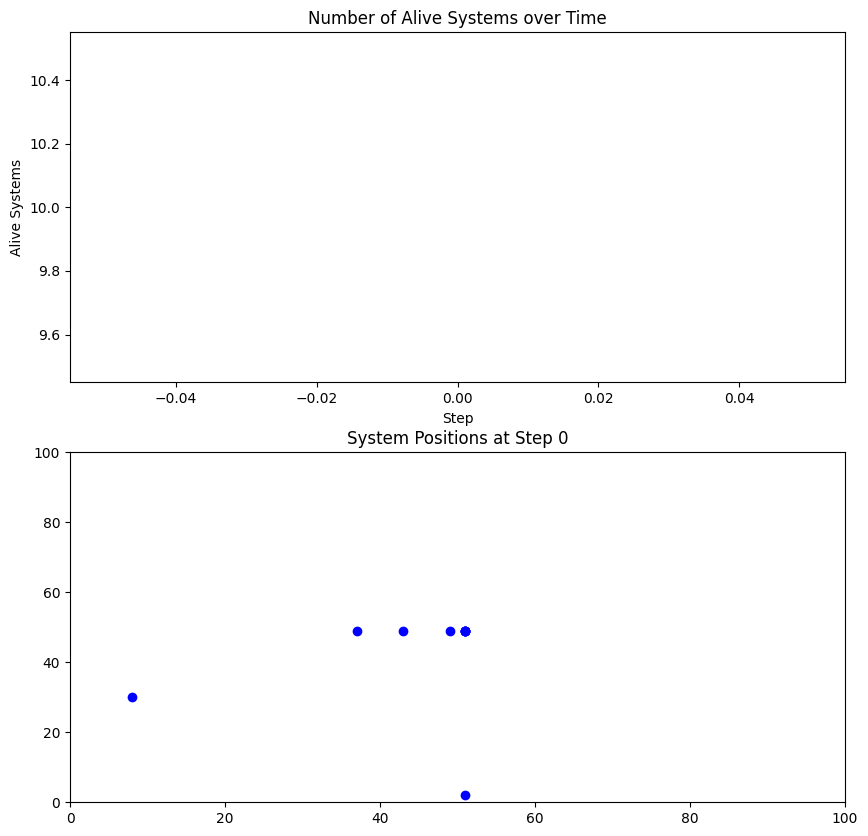

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from typing import List, Tuple

class InternalModel:
    def __init__(self):
        self.perceived_energy = 100
        self.perceived_environment = np.zeros((100, 100))

    def update_perception(self, external_info: np.ndarray, energy: float):
        self.perceived_energy = energy
        self.perceived_environment = external_info

    def decide_movement(self) -> Tuple[int, int]:
        # Á∞°Âçò„Å™ÊÑèÊÄùÊ±∫ÂÆö„É≠„Ç∏„ÉÉ„ÇØÔºöÁü•Ë¶ö„Åï„Çå„ÅüÁí∞Â¢É„ÅßÊúÄ„ÇÇÈ´ò„ÅÑÂÄ§„ÇíÊåÅ„Å§ÊñπÂêë„Å´ÁßªÂãï
        y, x = np.unravel_index(np.argmax(self.perceived_environment), self.perceived_environment.shape)
        return y - 50, x - 50  # ‰∏≠ÂøÉ„Åã„Çâ„ÅÆÁõ∏ÂØæÁöÑ„Å™ÁßªÂãï

class SelfOrganizingSystem:
    def __init__(self, x: int, y: int):
        self.x = x
        self.y = y
        self.energy = 100
        self.internal_model = InternalModel()

    def update(self, environment: np.ndarray):
        # „Ç®„Éç„É´„ÇÆ„Éº„ÅÆÊ∏õÂ∞ë
        self.energy -= 0.1

        # ÂÜÖÈÉ®„É¢„Éá„É´„ÅÆÊõ¥Êñ∞
        external_info = environment[max(0, self.y-50):min(100, self.y+50),
                                    max(0, self.x-50):min(100, self.x+50)]
        self.internal_model.update_perception(external_info, self.energy)

        # ÁßªÂãï„ÅÆÊ±∫ÂÆö
        dy, dx = self.internal_model.decide_movement()
        self.x = max(0, min(99, self.x + dx))
        self.y = max(0, min(99, self.y + dy))

    def is_alive(self) -> bool:
        return self.energy > 0

class Environment:
    def __init__(self):
        self.grid = np.zeros((100, 100))
        self.energy_source = (50, 50)

    def update(self):
        # „Ç®„Éç„É´„ÇÆ„ÉºÊ∫ê„ÅÆÁßªÂãïÔºà„É©„É≥„ÉÄ„É†„Ç¶„Ç©„Éº„ÇØÔºâ
        self.energy_source = (
            max(0, min(99, self.energy_source[0] + np.random.randint(-1, 2))),
            max(0, min(99, self.energy_source[1] + np.random.randint(-1, 2)))
        )
        self.grid.fill(0)
        self.grid[self.energy_source] = 100

    def provide_energy(self, system: SelfOrganizingSystem):
        distance = np.sqrt((system.x - self.energy_source[0])**2 + 
                           (system.y - self.energy_source[1])**2)
        if distance < 5:
            system.energy = min(100, system.energy + 10)

def simulate(num_systems: int, num_steps: int):
    environment = Environment()
    systems = [SelfOrganizingSystem(np.random.randint(100), np.random.randint(100)) 
               for _ in range(num_systems)]

    for step in range(num_steps):
        environment.update()
        for system in systems:
            if system.is_alive():
                system.update(environment.grid)
                environment.provide_energy(system)

        # ÁîüÂ≠ò„Ç∑„Çπ„ÉÜ„É†„ÅÆÊï∞„ÇíË®òÈå≤
        alive_count = sum(1 for system in systems if system.is_alive())
        yield step, alive_count, [(s.x, s.y) for s in systems if s.is_alive()]

# „Ç∑„Éü„É•„É¨„Éº„Ç∑„Éß„É≥„ÅÆÂÆüË°å„Å®ÂèØË¶ñÂåñ
num_systems = 10
num_steps = 1000

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

alive_counts = []
positions = []

for step, alive_count, pos in simulate(num_systems, num_steps):
    alive_counts.append(alive_count)
    positions.append(pos)

    if step % 50 == 0:  # 50„Çπ„ÉÜ„ÉÉ„Éó„Åî„Å®„Å´Êõ¥Êñ∞
        ax1.clear()
        ax1.plot(range(step+1), alive_counts)
        ax1.set_xlabel('Step')
        ax1.set_ylabel('Alive Systems')
        ax1.set_title('Number of Alive Systems over Time')

        ax2.clear()
        for p in pos:
            ax2.plot(p[0], p[1], 'bo')
        ax2.set_xlim(0, 100)
        ax2.set_ylim(0, 100)
        ax2.set_title(f'System Positions at Step {step}')

        plt.pause(0.1)

plt.show()

Initial internal states: [0.87356124 0.00673996 0.16256138 0.51508804]
Initial sensory states: [0.28629228 0.90808068 0.39134247 0.40185343]
Updated internal states: [0.88191558 0.00656927 0.15707389 0.49211691]
Updated sensory states: [0.28353458 0.89967471 0.38229753 0.38324156]
Variational Free Energy: 2.3780193255023168


/Users/riyon/Workspaces/AI_Girlfriend/work/Gen_AI_Girl_Friend/src/genetic_algorithm/markov_blanket/free_energy.py:7: RuntimeWarning: invalid value encountered in log
  return np.sum(q_x * np.log(q_x / p_x_given_s))


Text(0.5, 1.0, 'Variational Free Energy')

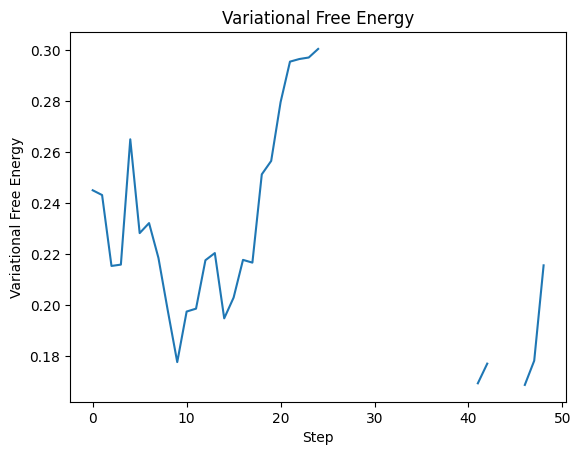

In [6]:
# ÂøÖË¶Å„Å™„É©„Ç§„Éñ„É©„É™„ÅÆ„Ç§„É≥„Éù„Éº„Éà
import numpy as np
import matplotlib.pyplot as plt
from markov_blanket.markov_blanket import MarkovBlanket
from markov_blanket.free_energy import calculate_variational_free_energy
from self_organizing_system.self_organizing_system import SelfOrganizingSystem

# „Éû„É´„Ç≥„Éï„Éñ„É©„É≥„Ç±„ÉÉ„Éà„ÅÆÂàùÊúüÂåñ
internal_states = np.random.rand(4)
external_states = np.random.rand(4)
sensory_states = np.random.rand(4)
active_states = np.random.rand(4)

markov_blanket = MarkovBlanket(internal_states, external_states, sensory_states, active_states)

# Áä∂ÊÖã„ÅÆÊõ¥Êñ∞Ââç„ÅÆË°®Á§∫
print("Initial internal states:", markov_blanket.internal_states)
print("Initial sensory states:", markov_blanket.sensory_states)

# Áä∂ÊÖã„ÅÆÊõ¥Êñ∞
markov_blanket.update_states()

# Áä∂ÊÖã„ÅÆÊõ¥Êñ∞Âæå„ÅÆË°®Á§∫
print("Updated internal states:", markov_blanket.internal_states)
print("Updated sensory states:", markov_blanket.sensory_states)

# Ëá™Áî±„Ç®„Éç„É´„ÇÆ„Éº„ÅÆË®àÁÆó
q_x = markov_blanket.internal_states
p_x_given_s = markov_blanket.external_states
p_s = np.sum(markov_blanket.sensory_states) / len(markov_blanket.sensory_states)

VFE = calculate_variational_free_energy(q_x, p_x_given_s, p_s)
print("Variational Free Energy:", VFE)

# Ëá™Â∑±ÁµÑÁπîÂåñ„Ç∑„Çπ„ÉÜ„É†„ÅÆÂàùÊúüÂåñ
system = SelfOrganizingSystem()

# Ëá™Â∑±ÁµÑÁπîÂåñ„Ç∑„Çπ„ÉÜ„É†„ÅÆ„Çπ„ÉÜ„ÉÉ„ÉóÂÆüË°å„Å®Ëá™Áî±„Ç®„Éç„É´„ÇÆ„Éº„ÅÆË®òÈå≤
num_steps = 100
free_energies = []

for _ in range(num_steps):
    VFE = system.step()
    free_energies.append(VFE)

# Ëá™Áî±„Ç®„Éç„É´„ÇÆ„Éº„ÅÆ„Éó„É≠„ÉÉ„Éà
plt.plot(free_energies)
plt.xlabel('Step')
plt.ylabel('Variational Free Energy')
plt.title('Variational Free Energy')



 ****** Running generation 0 ****** 

Population's average fitness: 4.00000 stdev: 0.00000
Best fitness: 4.00000 - size: (2, 2) - species 1 - id 1

Best individual in generation 0 meets fitness threshold - complexity: (2, 2)
Best genome:
Key: 1
Fitness: 4.0
Nodes:
	0 DefaultNodeGene(key=0, bias=0.2816164212133134, response=1.0, activation=sigmoid, aggregation=sum)
	1 DefaultNodeGene(key=1, bias=0.6858046926373648, response=1.0, activation=sigmoid, aggregation=sum)
Connections:
	DefaultConnectionGene(key=(-1, 1), weight=-0.9414966070427433, enabled=True)
	DefaultConnectionGene(key=(1, 0), weight=0.3578366170356092, enabled=True)


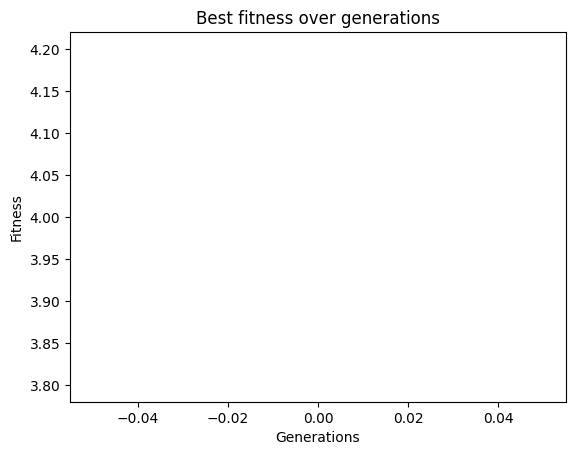

In [10]:

from genetic_algorithm.neat_algorithm import NEATAlgorithm

# NEATË®≠ÂÆö„Éï„Ç°„Ç§„É´„ÅÆ„Éë„Çπ
config_path = "neat_config.yaml"

# NEAT„Ç¢„É´„Ç¥„É™„Ç∫„É†„ÅÆÂàùÊúüË®≠ÂÆö„Å®„Ç∑„Éü„É•„É¨„Éº„Ç∑„Éß„É≥„ÅÆÂÆüË°å
neat_algo = NEATAlgorithm(config_path)
winner = neat_algo.run(50)  # 50‰∏ñ‰ª£„ÅßÈÄ≤Âåñ„ÇíÂÆüË°å

# ÁµêÊûú„ÅÆË°®Á§∫
print("Best genome:\n{!s}".format(winner))

# ÁµêÊûú„ÅÆ„Éó„É≠„ÉÉ„Éà
def plot_stats(statistics, ylog=False, view=False, filename='avg_fitness.svg'):
    generation = range(len(statistics.most_fit_genomes))
    best_fitness = [c.fitness for c in statistics.most_fit_genomes]

    fig, ax = plt.subplots()
    ax.plot(generation, best_fitness, 'r-', label="best")
    plt.title("Best fitness over generations")
    plt.xlabel("Generations")
    plt.ylabel("Fitness")

    if ylog:
        plt.yscale('log')

    plt.savefig(filename)
    if view:
        plt.show()
    plt.close()

def plot_species(statistics, view=False, filename='speciation.svg'):
    generation = range(len(statistics.most_fit_genomes))
    species_sizes = statistics.get_species_sizes()

    fig, ax = plt.subplots()
    ax.stackplot(generation, species_sizes, alpha=0.5)
    plt.title("Speciation")
    plt.xlabel("Generations")
    plt.ylabel("Species size")
    plt.savefig(filename)
    if view:
        plt.show()
    plt.close()

# ÈÅ©ÂøúÂ∫¶„ÅÆ„Éó„É≠„ÉÉ„Éà
plot_stats(neat_algo.stats, ylog=False, view=True)
plot_species(neat_algo.stats, view=True)


/Users/riyon/Workspaces/AI_Girlfriend/work/Gen_AI_Girl_Friend/src/genetic_algorithm/markov_blanket/free_energy.py:7: RuntimeWarning: invalid value encountered in log
  return np.sum(q_x * np.log(q_x / p_x_given_s))


Generation 0: Average VFE = 1.531336339480414
Generation 1: Average VFE = 1.5288949889263115
Generation 2: Average VFE = 1.5191096553329946
Generation 3: Average VFE = 1.543864724587268
Generation 4: Average VFE = 1.5232860528510883
Generation 5: Average VFE = 1.5594749080045953
Generation 6: Average VFE = 1.5616970586706478
Generation 7: Average VFE = 1.5397628413340798
Generation 8: Average VFE = 1.6013101094068396
Generation 9: Average VFE = 1.5718509012484136
Generation 10: Average VFE = 1.6007348438713105
Generation 11: Average VFE = 1.5471993163732745
Generation 12: Average VFE = 1.6132701800135778
Generation 13: Average VFE = 1.6257927415007392
Generation 14: Average VFE = 1.6307358850818943
Generation 15: Average VFE = 1.6144206487306605
Generation 16: Average VFE = 1.6306771882137046
Generation 17: Average VFE = 1.6611258936641171
Generation 18: Average VFE = 1.668485536100998
Generation 19: Average VFE = 1.6840671577109634
Generation 20: Average VFE = 1.6923640706578567
Gener

/Users/riyon/Workspaces/AI_Girlfriend/work/Gen_AI_Girl_Friend/src/genetic_algorithm/markov_blanket/free_energy.py:14: RuntimeWarning: invalid value encountered in log
  VFE = D_KL - np.log(p_s)


Generation 48: Average VFE = 2.377437025558057
Generation 49: Average VFE = 2.308758925452824


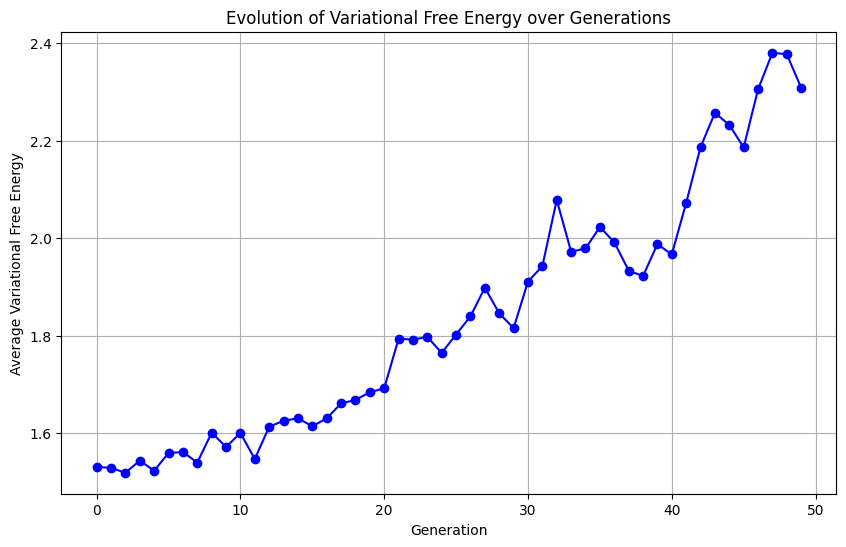

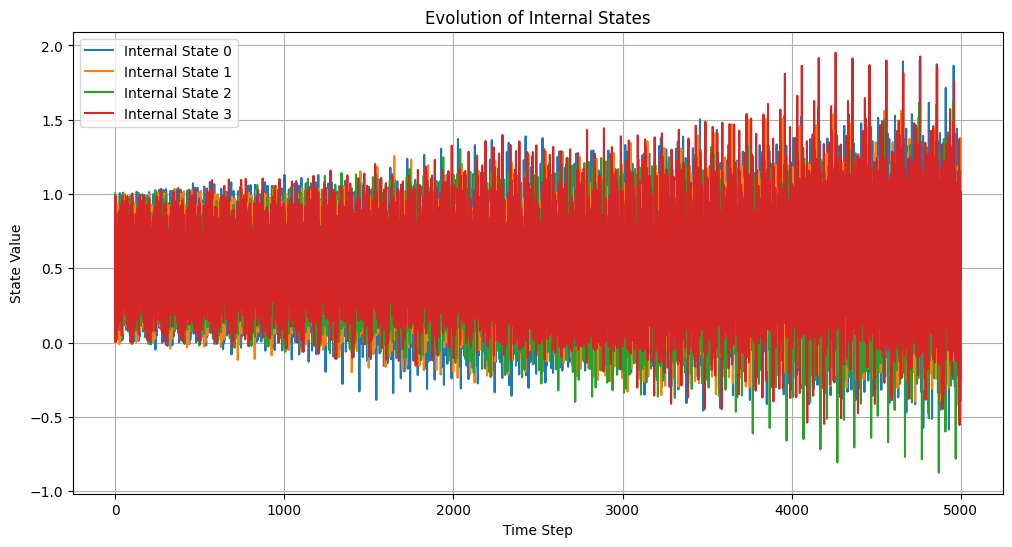

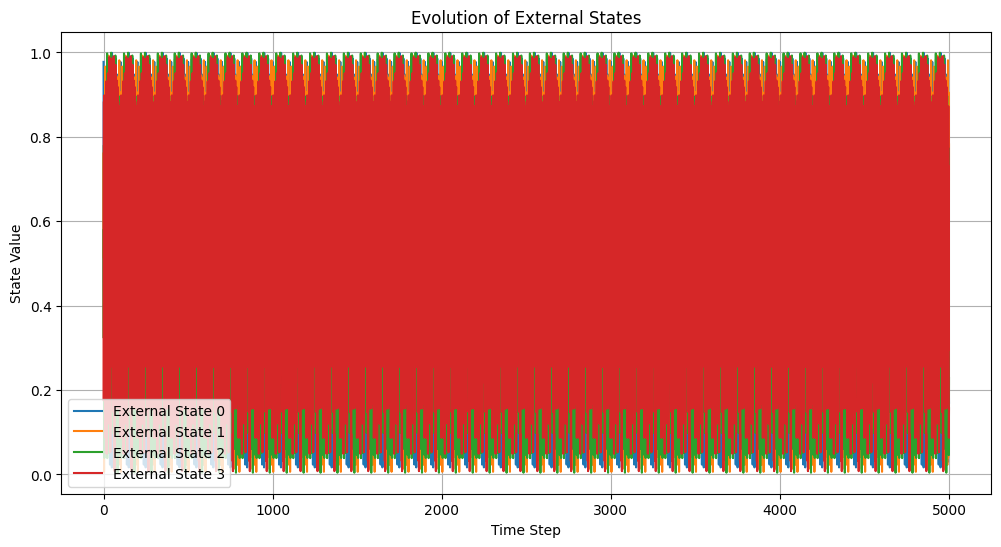

In [20]:

# ÂøÖË¶Å„Å™„É©„Ç§„Éñ„É©„É™„ÅÆ„Ç§„É≥„Éù„Éº„Éà
import numpy as np
import matplotlib.pyplot as plt
import constant_values as const
from markov_blanket.markov_blanket import MarkovBlanket
from markov_blanket.free_energy import calculate_variational_free_energy
from self_organizing_system.self_organizing_system import SelfOrganizingSystem
from genetic_algorithm.poet_algorithm import POETAlgorithm

# „Ç®„Éº„Ç∏„Çß„É≥„Éà„ÅÆÂÜÖÈÉ®Áä∂ÊÖã„Å®Â§ñÈÉ®Áä∂ÊÖã„ÇíËøΩË∑°„Åô„Çã„É™„Çπ„Éà
internal_states_history = []
external_states_history = []

# POET„Ç¢„É´„Ç¥„É™„Ç∫„É†„ÅÆÂàùÊúüË®≠ÂÆö
ga = POETAlgorithm(population_size=const.POPULATION_SIZE, mutation_rate=const.MUTATION_RATE)

# ÈÄ≤ÂåñÈÅéÁ®ã„ÅÆËá™Áî±„Ç®„Éç„É´„ÇÆ„Éº„ÅÆË®òÈå≤
free_energies = []
for generation in range(const.NUM_GENERATIONS):
    ga.evolve()
    generation_energies = []
    for agent in ga.population:
        VFE = agent.step()
        generation_energies.append(VFE)
        internal_states_history.append(agent.markov_blanket.internal_states.copy())
        external_states_history.append(agent.markov_blanket.external_states.copy())
    
    avg_energy = np.nanmean(generation_energies)  # NaN„ÇíÁÑ°Ë¶ñ„Åó„Å¶Âπ≥Âùá„ÇíË®àÁÆó
    free_energies.append(avg_energy)
    print(f"Generation {generation}: Average VFE = {avg_energy}")  # ÂêÑ‰∏ñ‰ª£„ÅÆÂπ≥ÂùáVFE„ÇíÂá∫Âäõ

# Ëá™Áî±„Ç®„Éç„É´„ÇÆ„Éº„ÅÆ„Éó„É≠„ÉÉ„Éà
plt.figure(figsize=(10, 6))
plt.plot(free_energies, marker='o', linestyle='-', color='b')
plt.xlabel('Generation')
plt.ylabel('Average Variational Free Energy')
plt.title('Evolution of Variational Free Energy over Generations')
plt.grid(True)
plt.show()

# ÂÜÖÈÉ®Áä∂ÊÖã„ÅÆÈÄ≤Âåñ„Çí„Éó„É≠„ÉÉ„Éà
internal_states_history = np.array(internal_states_history)
plt.figure(figsize=(12, 6))
for i in range(internal_states_history.shape[1]):
    plt.plot(internal_states_history[:, i], label=f'Internal State {i}')
plt.xlabel('Time Step')
plt.ylabel('State Value')
plt.title('Evolution of Internal States')
plt.legend()
plt.grid(True)
plt.show()

# Â§ñÈÉ®Áä∂ÊÖã„ÅÆÈÄ≤Âåñ„Çí„Éó„É≠„ÉÉ„Éà
external_states_history = np.array(external_states_history)
plt.figure(figsize=(12, 6))
for i in range(external_states_history.shape[1]):
    plt.plot(external_states_history[:, i], label=f'External State {i}')
plt.xlabel('Time Step')
plt.ylabel('State Value')
plt.title('Evolution of External States')
plt.legend()
plt.grid(True)
plt.show()


 ****** Running generation 0 ****** 

Population's average fitness: 4.00000 stdev: 0.00000
Best fitness: 4.00000 - size: (2, 2) - species 1 - id 1

Best individual in generation 0 meets fitness threshold - complexity: (2, 2)
Best genome:
Key: 1
Fitness: 4.0
Nodes:
	0 DefaultNodeGene(key=0, bias=0.24272077161312017, response=1.0, activation=sigmoid, aggregation=sum)
	1 DefaultNodeGene(key=1, bias=0.3707128275229434, response=1.0, activation=sigmoid, aggregation=sum)
Connections:
	DefaultConnectionGene(key=(-1, 0), weight=0.44944772951379164, enabled=True)
	DefaultConnectionGene(key=(-1, 1), weight=0.036889592966882184, enabled=True)


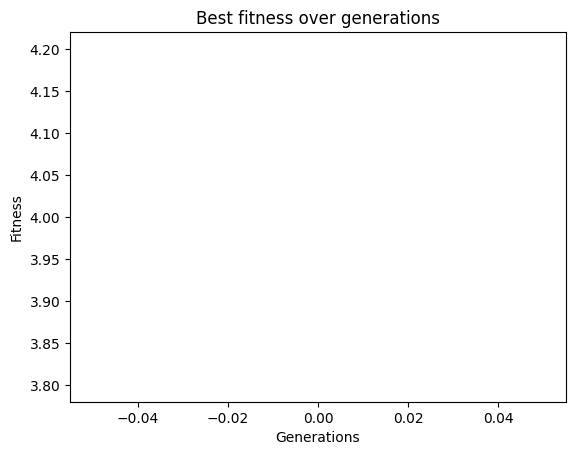

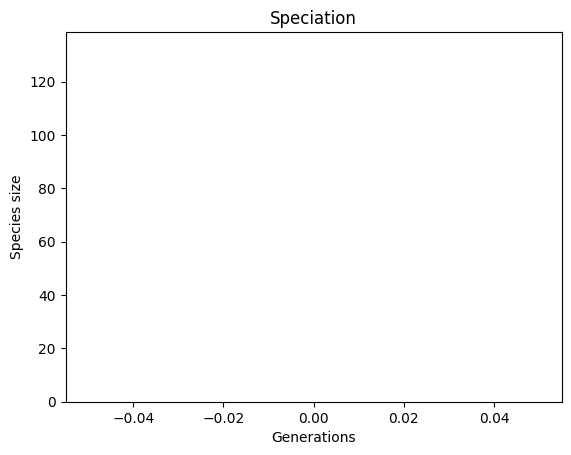

In [9]:
from genetic_algorithm.neat_algorithm import NEATAlgorithm

# NEATË®≠ÂÆö„Éï„Ç°„Ç§„É´„ÅÆ„Éë„Çπ
config_path = "neat_config.yaml"

# NEAT„Ç¢„É´„Ç¥„É™„Ç∫„É†„ÅÆÂàùÊúüË®≠ÂÆö„Å®„Ç∑„Éü„É•„É¨„Éº„Ç∑„Éß„É≥„ÅÆÂÆüË°å
neat_algo = NEATAlgorithm(config_path)
winner = neat_algo.run(50)  # 50‰∏ñ‰ª£„ÅßÈÄ≤Âåñ„ÇíÂÆüË°å

# ÁµêÊûú„ÅÆË°®Á§∫
print("Best genome:\n{!s}".format(winner))

# ÁµêÊûú„ÅÆ„Éó„É≠„ÉÉ„Éà
def plot_stats(statistics, ylog=False, view=False, filename='avg_fitness.svg'):
    generation = range(len(statistics.most_fit_genomes))
    best_fitness = [c.fitness for c in statistics.most_fit_genomes]

    fig, ax = plt.subplots()
    ax.plot(generation, best_fitness, 'r-', label="best")
    plt.title("Best fitness over generations")
    plt.xlabel("Generations")
    plt.ylabel("Fitness")

    if ylog:
        plt.yscale('log')

    plt.savefig(filename)
    if view:
        plt.show()
    plt.close()

def plot_species(statistics, view=False, filename='speciation.svg'):
    generation = range(len(statistics.most_fit_genomes))
    species_sizes = statistics.get_species_sizes()

    fig, ax = plt.subplots()
    ax.stackplot(generation, species_sizes, alpha=0.5)
    plt.title("Speciation")
    plt.xlabel("Generations")
    plt.ylabel("Species size")
    plt.savefig(filename)
    if view:
        plt.show()
    plt.close()

# ÈÅ©ÂøúÂ∫¶„ÅÆ„Éó„É≠„ÉÉ„Éà
plot_stats(neat_algo.stats, ylog=False, view=True)
plot_species(neat_algo.stats, view=True)


In [3]:
import neat
import os

# XORÂïèÈ°å„ÅÆ„Éá„Éº„Çø„Çª„ÉÉ„Éà
xor_inputs = [(0, 0), (0, 1), (1, 0), (1, 1)]
xor_outputs = [0, 1, 1, 0]

# XORÂïèÈ°å„ÅÆÈÅ©ÂøúÂ∫¶Èñ¢Êï∞
def eval_genomes(genomes, config):
    for genome_id, genome in genomes:
        net = neat.nn.FeedForwardNetwork.create(genome, config)
        genome.fitness = 4.0  # ÂàùÊúüÂåñ
        for xi, xo in zip(xor_inputs, xor_outputs):
            output = net.activate(xi)
            genome.fitness -= (output[0] - xo) ** 2  # ‰∫å‰πóË™§Â∑Æ„ÇíÂü∫„Å´ÈÅ©ÂøúÂ∫¶„ÇíÊ∏õ„Çâ„Åô

# NEAT„Ç¢„É´„Ç¥„É™„Ç∫„É†„ÅÆÂÆüË°å
def run(config_file):
    config = neat.Config(neat.DefaultGenome, neat.DefaultReproduction,
                         neat.DefaultSpeciesSet, neat.DefaultStagnation,
                         config_file)

    population = neat.Population(config)

    # Âá∫Âäõ„ÅÆÂèØË¶ñÂåñ
    population.add_reporter(neat.StdOutReporter(True))
    stats = neat.StatisticsReporter()
    population.add_reporter(stats)

    winner = population.run(eval_genomes, 300)  # 300‰∏ñ‰ª£„Åæ„ÅßÈÄ≤Âåñ

    # ÁµêÊûú„ÇíË°®Á§∫
    print('\nÊúÄËâØ„ÅÆ„Ç≤„Éé„É†:\n{!s}'.format(winner))

if __name__ == '__main__':
    # Ë®≠ÂÆö„Éï„Ç°„Ç§„É´„ÅÆË™≠„ÅøËæº„Åø
    config_path = os.path.join(os.getcwd(), 'neat_config.yaml')
    run(config_path)



 ****** Running generation 0 ****** 

Population's average fitness: 2.16112 stdev: 0.27826
Best fitness: 2.99406 - size: (2, 2) - species 1 - id 146

Best individual in generation 0 meets fitness threshold - complexity: (2, 2)

ÊúÄËâØ„ÅÆ„Ç≤„Éé„É†:
Key: 146
Fitness: 2.994062439060937
Nodes:
	0 DefaultNodeGene(key=0, bias=-0.03087050639333223, response=1.0, activation=sigmoid, aggregation=sum)
	146 DefaultNodeGene(key=146, bias=-1.9832117591028193, response=1.0, activation=sigmoid, aggregation=sum)
Connections:
	DefaultConnectionGene(key=(-2, 146), weight=-1.6549571262619507, enabled=True)
	DefaultConnectionGene(key=(146, 0), weight=-0.5240536131036411, enabled=True)


In [18]:
# ÂøÖË¶Å„Å™„É©„Ç§„Éñ„É©„É™„Çí„Ç§„É≥„Éù„Éº„Éà
import neat
import os
import numpy as np
import matplotlib.pyplot as plt
from markov_blanket.markov_blanket import MarkovBlanket
from markov_blanket.free_energy import calculate_variational_free_energy
from genetic_algorithm.neat_algorithm import NEATAlgorithm  # ‰ΩúÊàê„Åó„ÅüNEATAlgorithm„ÇØ„É©„Çπ„Çí„Ç§„É≥„Éù„Éº„Éà

# NEAT„Ç¢„É´„Ç¥„É™„Ç∫„É†„Çí„ÉÜ„Çπ„Éà„Åô„ÇãÈñ¢Êï∞
def test_neat_algorithm():
    # Ë®≠ÂÆö„Éï„Ç°„Ç§„É´„ÅÆ„Éë„Çπ„ÇíÊåáÂÆö
    config_path = os.path.join(os.getcwd(), 'neat_config.yaml')
    
    # NEAT„Ç¢„É´„Ç¥„É™„Ç∫„É†„ÇíÂàùÊúüÂåñ
    neat_algo = NEATAlgorithm(config_path)
    
    # ÈÄ≤Âåñ„ÇíÂÆüË°åÔºà‰æã„Å®„Åó„Å¶300‰∏ñ‰ª£„Åæ„ÅßÔºâ
    winner = neat_algo.run(2)
    
    # ÊúÄËâØ„ÅÆ„Ç≤„Éé„É†ÔºàÈÄ≤Âåñ„ÅÆÁµêÊûúÔºâ„ÇíÂá∫Âäõ
    print(f'ÊúÄËâØ„ÅÆ„Ç≤„Éé„É†:\n{winner}')

    # ÈÅ©ÂøúÂ∫¶„ÇíË©ï‰æ°„Åô„ÇãÈñ¢Êï∞„Çí„ÉÜ„Çπ„Éà
    print("\nÈÅ©ÂøúÂ∫¶„ÅÆ„ÉÜ„Çπ„Éà")
    initial_fitness = neat_algo.evaluate_fitness(winner, neat_algo.config)
    print(f"ÂàùÊúüÈÅ©ÂøúÂ∫¶: {initial_fitness}")

    # „Ç∑„Éü„É•„É¨„Éº„Ç∑„Éß„É≥„Çπ„ÉÜ„ÉÉ„Éó„Åî„Å®„ÅÆËá™Áî±„Ç®„Éç„É´„ÇÆ„Éº„ÅÆÂ§âÂåñ„ÇíÂèØË¶ñÂåñ
    fitness_history = []
    for _ in range(100):
        fitness = neat_algo.evaluate_fitness(winner, neat_algo.config)
        fitness_history.append(fitness)

    # ‰∏ñ‰ª£„Åî„Å®„ÅÆÊúÄËâØÈÅ©ÂøúÂ∫¶„ÅÆÂ§âÂåñ„Çí„Éó„É≠„ÉÉ„Éà
    plt.plot(neat_algo.best_fitness_per_generation)
    plt.xlabel('Generation')
    plt.ylabel('Best Fitness')
    plt.title('Best Fitness over Generations')
    plt.show()

# „ÉÜ„Çπ„ÉàÈñ¢Êï∞„ÇíÂÆüË°å
test_neat_algorithm()



 ****** Running generation 0 ****** 

Population's average fitness: -17212.95671 stdev: 25860.12781
Best fitness: 2006.45696 - size: (2, 10) - species 1 - id 83
Average adjusted fitness: 0.845
Mean genetic distance 2.700, standard deviation 0.717
Population of 300 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    0    23   2006.5    0.871     0
     2    0    42   1854.1    0.949     0
     3    0   235   1801.0    0.714     0
Total extinctions: 0
Generation time: 9.177 sec

 ****** Running generation 1 ****** 

Population's average fitness: -4648.76510 stdev: 18622.89468
Best fitness: 2178.71038 - size: (2, 9) - species 3 - id 477
Average adjusted fitness: 0.967
Mean genetic distance 2.517, standard deviation 0.781
Population of 300 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    1    70   1873.9    0.965     1
     2    1    68   2076.4    0.987     0

AttributeError: 'NEATAlgorithm' object has no attribute 'best_fitness_per_generation'

In [24]:
# ÂøÖË¶Å„Å™„É©„Ç§„Éñ„É©„É™„Çí„Ç§„É≥„Éù„Éº„Éà
import os
import matplotlib.pyplot as plt
from genetic_algorithm.neat_algorithm import NEATAlgorithm  # NEATAlgorithm„ÇØ„É©„Çπ„Çí„Ç§„É≥„Éù„Éº„Éà

# NEAT„Ç¢„É´„Ç¥„É™„Ç∫„É†„Çí„ÉÜ„Çπ„Éà„Åô„ÇãÈñ¢Êï∞
def test_neat_algorithm():
    # Ë®≠ÂÆö„Éï„Ç°„Ç§„É´„ÅÆ„Éë„Çπ„ÇíÊåáÂÆö
    config_path = os.path.join(os.getcwd(), 'neat_config.yaml')
    
    # NEAT„Ç¢„É´„Ç¥„É™„Ç∫„É†„ÇíÂàùÊúüÂåñ
    neat_algo = NEATAlgorithm(config_path)
    
    # ÈÄ≤Âåñ„ÇíÂÆüË°å
    winner = neat_algo.run(300)
    
    # ÊúÄËâØ„ÅÆ„Ç≤„Éé„É†ÔºàÈÄ≤Âåñ„ÅÆÁµêÊûúÔºâ„ÇíÂá∫Âäõ
    print(f'ÊúÄËâØ„ÅÆ„Ç≤„Éé„É†:\n{winner}')

    # Áµ±Ë®àÊÉÖÂ†±„Åã„Çâ‰∏ñ‰ª£„Åî„Å®„ÅÆÊúÄËâØÈÅ©ÂøúÂ∫¶„ÇíÂèñÂæó„Åó„Å¶„Éó„É≠„ÉÉ„Éà
    best_fitnesses = [genome.fitness for genome in neat_algo.stats.most_fit_genomes]
    
    # „Éó„É≠„ÉÉ„Éà
    plt.plot(best_fitnesses)
    plt.xlabel('Generation')
    plt.ylabel('Best Fitness')
    plt.title('Best Fitness over Generations')
    plt.show()

# „ÉÜ„Çπ„ÉàÈñ¢Êï∞„ÇíÂÆüË°å
test_neat_algorithm()



 ****** Running generation 0 ****** 

Population's average fitness: -18131.38481 stdev: 27301.81305
Best fitness: 2117.30341 - size: (2, 10) - species 1 - id 51
Average adjusted fitness: 0.852
Mean genetic distance 2.464, standard deviation 0.607
Population of 300 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    0   110   2117.3    0.878     0
     2    0    82   1821.2    0.691     0
     3    0   108   1814.3    0.987     0
Total extinctions: 0
Generation time: 9.161 sec

 ****** Running generation 1 ****** 

Population's average fitness: -6521.26465 stdev: 17647.43289
Best fitness: 2089.67857 - size: (2, 8) - species 3 - id 452
Average adjusted fitness: 0.907
Mean genetic distance 2.070, standard deviation 0.467
Population of 300 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    1   144   2006.6    0.932     1
     2    1    84   1917.2    0.805     0

In [2]:
import torch.nn as nn

fc = nn.Linear(3, 2)

fc.weight
fc.bias

Parameter containing:
tensor([ 0.3317, -0.0580], requires_grad=True)

In [9]:
import torch
import torch.nn as nn

torch.manual_seed(1)

fc = nn.Linear(3, 2)

fc.weight
fc.bias

Parameter containing:
tensor([-0.1188,  0.2937], requires_grad=True)

In [15]:
# „É™„Çπ„Éà„Åã„Çâ PyTorch „ÅÆ Tensor „Å´Â§âÊèõ
x = torch.tensor([[1, 2, 3]], dtype=torch.float32)
type(x)

u = fc(x)
u

tensor([[-0.6667,  0.5164]], grad_fn=<AddmmBackward0>)

In [16]:
import torch.nn.functional as F

z = F.relu(u)
z

tensor([[0.0000, 0.5164]], grad_fn=<ReluBackward0>)

In [18]:
torch.manual_seed(1)

fc1 = nn.Linear(3, 2)
fc2 = nn.Linear(2, 1)

x = torch.tensor([[1, 2, 3]], dtype=torch.float32)

u = fc1(x)

z = F.relu(u)

y = fc2(u)

y

tensor([[0.0859]], grad_fn=<AddmmBackward0>)

In [23]:
import threading
import time

def worker():
    print(f"„Çπ„É¨„ÉÉ„Éâ {threading.current_thread().name} ÈñãÂßã")
    time.sleep(2)
    print(f"„Çπ„É¨„ÉÉ„Éâ {threading.current_thread().name} ÁµÇ‰∫Ü")

# „Çπ„É¨„ÉÉ„Éâ„ÇíÈñãÂßã
threads = [threading.Thread(target=worker, name=f"Worker-{i}") for i in range(3)]
for t in threads:
    t.start()

# ÈÄî‰∏≠„Åß„Çπ„É¨„ÉÉ„Éâ‰∏ÄË¶ß„ÇíÁ¢∫Ë™ç
time.sleep(1)
print("üîç ÂÆüË°å‰∏≠„ÅÆ„Çπ„É¨„ÉÉ„Éâ‰∏ÄË¶ß:", threading.enumerate())

# „Åô„Åπ„Å¶„ÅÆ„Çπ„É¨„ÉÉ„Éâ„Çí join()
for t in threads:
    t.join()

# „Çπ„É¨„ÉÉ„ÉâÁµÇ‰∫ÜÂæå„Å´‰∏ÄË¶ß„ÇíÁ¢∫Ë™ç
print("‚úÖ „Åô„Åπ„Å¶„ÅÆ„Çπ„É¨„ÉÉ„Éâ„ÅåÁµÇ‰∫Ü„Åó„Åü„Åã:", threading.enumerate())

„Çπ„É¨„ÉÉ„Éâ Worker-0 ÈñãÂßã
„Çπ„É¨„ÉÉ„Éâ Worker-1 ÈñãÂßã
„Çπ„É¨„ÉÉ„Éâ Worker-2 ÈñãÂßã
üîç ÂÆüË°å‰∏≠„ÅÆ„Çπ„É¨„ÉÉ„Éâ‰∏ÄË¶ß: [<_MainThread(MainThread, started 8702116416)>, <Thread(IOPub, started daemon 6154088448)>, <Heartbeat(Heartbeat, started daemon 6170914816)>, <Thread(Thread-1 (_watch_pipe_fd), started daemon 6188888064)>, <Thread(Thread-2 (_watch_pipe_fd), started daemon 6205714432)>, <ControlThread(Control, started daemon 6222540800)>, <HistorySavingThread(IPythonHistorySavingThread, started 6239367168)>, <Thread(Worker-0, started 6256766976)>, <Thread(Worker-1, started 6273593344)>, <Thread(Worker-2, started 6290419712)>]
„Çπ„É¨„ÉÉ„Éâ Worker-2 ÁµÇ‰∫Ü„Çπ„É¨„ÉÉ„Éâ Worker-1 ÁµÇ‰∫Ü
„Çπ„É¨„ÉÉ„Éâ Worker-0 ÁµÇ‰∫Ü

‚úÖ „Åô„Åπ„Å¶„ÅÆ„Çπ„É¨„ÉÉ„Éâ„ÅåÁµÇ‰∫Ü„Åó„Åü„Åã: [<_MainThread(MainThread, started 8702116416)>, <Thread(IOPub, started daemon 6154088448)>, <Heartbeat(Heartbeat, started daemon 6170914816)>, <Thread(Thread-1 (_watch_pipe_fd), started daemon 6188888064)>, <Thread(Thread-2 (_

In [20]:
import threading
import time

def worker():
    time.sleep(2)

threads = [threading.Thread(target=worker) for _ in range(3)]
for t in threads:
    t.start()

# ÈÄî‰∏≠„Åß„Çπ„É¨„ÉÉ„Éâ„ÅÆÁä∂ÊÖã„ÇíÁ¢∫Ë™ç
time.sleep(1)
for i, t in enumerate(threads):
    print(f"„Çπ„É¨„ÉÉ„Éâ {i}: {'ÂÆüË°å‰∏≠' if t.is_alive() else 'ÁµÇ‰∫Ü'}")

# join() „ÅßÁ¢∫ÂÆü„Å´ÁµÇ‰∫Ü„ÇíÂæÖ„Å§
for t in threads:
    t.join()

print("‚úÖ „Åô„Åπ„Å¶„ÅÆ„Çπ„É¨„ÉÉ„Éâ„ÅåÁµÇ‰∫Ü„Åó„Åæ„Åó„Åü")


„Çπ„É¨„ÉÉ„Éâ 0: ÂÆüË°å‰∏≠
„Çπ„É¨„ÉÉ„Éâ 1: ÂÆüË°å‰∏≠
„Çπ„É¨„ÉÉ„Éâ 2: ÂÆüË°å‰∏≠
‚úÖ „Åô„Åπ„Å¶„ÅÆ„Çπ„É¨„ÉÉ„Éâ„ÅåÁµÇ‰∫Ü„Åó„Åæ„Åó„Åü


In [5]:
import requests
import json
import logging

logger = logging.getLogger(__name__)

def get_llm_resut(pre_prompt, conversation_history):
    """LLM „Å∏„É™„ÇØ„Ç®„Çπ„Éà„ÇíÈÄÅ„Çä„ÄÅ„Ç®„É©„Éº„Éè„É≥„Éâ„É™„É≥„Ç∞„ÇíÂº∑Âåñ„ÄÇ"""
    API_URL = "https://blci59i3jk.execute-api.ap-northeast-1.amazonaws.com/genai-func-okada"
    payload = {
        "pre_prompt": pre_prompt,
        "conversation_history": conversation_history
    }

    print(payload)

    try:
        response = requests.post(API_URL, data=json.dumps(payload))
        response.raise_for_status()  # HTTP„Ç®„É©„Éº„ÇíËá™Âãï„ÅßÊ§úÂá∫
        
        result = response.json()
        if "response" in result and len(result["response"]) > 0:
            return result["response"][0]["text"]
        else:
            raise ValueError("LLM„ÅÆÂøúÁ≠î„Åå‰∏çÊ≠£„Åß„Åô")

    except requests.exceptions.RequestException as e:
        logger.error(f"LLM API request failed: {e}")
        return ""

    except (json.JSONDecodeError, ValueError) as e:
        logger.error(f"LLM API JSON parse error: {e}")
        return ""


In [9]:
messages = [{"role": "user", "content": "„Åì„Çå„ÅØ„ÉÜ„Çπ„Éà„Åß„Åô."}]
result = get_llm_resut("test", messages)
result

{'pre_prompt': 'test', 'conversation_history': [{'role': 'user', 'content': '„Åì„Çå„ÅØ„ÉÜ„Çπ„Éà„Åß„Åô.'}]}


'„ÅØ„ÅÑ„ÄÅÊâøÁü•„ÅÑ„Åü„Åó„Åæ„Åó„Åü„ÄÇ„Åì„Çå„Åå„ÉÜ„Çπ„Éà„Åß„ÅÇ„Çã„Åì„Å®„ÇíÁêÜËß£„Åó„Åæ„Åó„Åü„ÄÇ‰Ωï„ÅãÂÖ∑‰ΩìÁöÑ„Å™Ë≥™Âïè„ÇÑ„Çø„Çπ„ÇØ„Åå„ÅÇ„Çä„Åæ„Åó„Åü„Çâ„ÄÅÂñú„Çì„Åß„ÅäÊâã‰ºù„ÅÑ„Åï„Åõ„Å¶„ÅÑ„Åü„Å†„Åç„Åæ„Åô„ÄÇ'